## TaON_gradient_20190315_rSap_re

In [18]:
# Import necessary packages
import numpy as np
import matplotlib.pylab as plt
import glob
from matplotlib.colors import LogNorm
import matplotlib as mpl
import peakutils
plt.rcParams["font.family"] = "Times New Roman"

In [19]:
# Inputs
load_path=r'D:\Box Sync\TaON\TiON_gradient_20190315__rSap_annealed\\'
save_path=r'D:\Box Sync\TaON\TiON_gradient_20190315__rSap_annealed\TaON_gradient_20190315_rSap_annealed_Analysis\\'
samplename='TaON_rsap_20190315_annealed'


## Process the data

In [3]:
# To see all the files in the path.
glob.glob(load_path+'*.txt')

['D:\\Box Sync\\TaON\\TiON_gradient_20190315__rSap_annealed\\TiON_gradient_20190315_annealed_001_01_0-000_-12-500.txt',
 'D:\\Box Sync\\TaON\\TiON_gradient_20190315__rSap_annealed\\TiON_gradient_20190315_annealed_001_02_0-000_-12-150.txt',
 'D:\\Box Sync\\TaON\\TiON_gradient_20190315__rSap_annealed\\TiON_gradient_20190315_annealed_001_03_0-000_-11-800.txt',
 'D:\\Box Sync\\TaON\\TiON_gradient_20190315__rSap_annealed\\TiON_gradient_20190315_annealed_001_04_0-000_-11-450.txt',
 'D:\\Box Sync\\TaON\\TiON_gradient_20190315__rSap_annealed\\TiON_gradient_20190315_annealed_001_05_0-000_-11-100.txt',
 'D:\\Box Sync\\TaON\\TiON_gradient_20190315__rSap_annealed\\TiON_gradient_20190315_annealed_001_06_0-000_-10-750.txt',
 'D:\\Box Sync\\TaON\\TiON_gradient_20190315__rSap_annealed\\TiON_gradient_20190315_annealed_001_07_0-000_-10-400.txt',
 'D:\\Box Sync\\TaON\\TiON_gradient_20190315__rSap_annealed\\TiON_gradient_20190315_annealed_001_08_0-000_-10-050.txt',
 'D:\\Box Sync\\TaON\\TiON_gradient_2019

In [7]:
# Inputs
# Selecet the files with a specific extension and exclude some files.
data_files=glob.glob(load_path+'*.txt')[1:] 
data_files[0],data_files[-1]

IndexError: list index out of range

In [6]:
number_of_files=len(data_files)

In [7]:
# test import a file
test=np.genfromtxt(data_files[1],skip_header=559)

test.shape

(1001, 2)

Text(0.5, 1.0, 'Sample data from TaON_rsap_20190315_annealed')

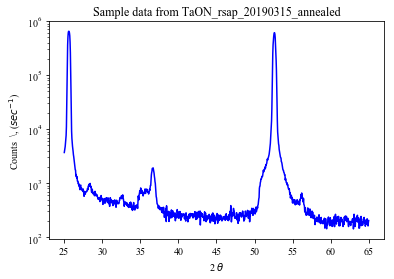

In [8]:
#test plot
plt.semilogy(test[:,0],test[:,1],'b-')
plt.xlabel('2 $\\theta $')
plt.ylabel('Counts  \, ($sec^{-1}$)')
plt.title('Sample data from '+ samplename)

In [9]:
file=data_files[1]
file

'C:\\Users\\Achari\\Box\\TaON\\TiON_gradient_20190315__rSap_annealed\\TiON_gradient_20190315_annealed_001_03_0-000_-11-800.txt'

In [10]:
y_str=file.split('_')[-1].split('.')[0]
y_str=y_str[:-4] + '.' + y_str[-3:]

x_str=file.split('_')[-2]
x_str=x_str[:-4] + '.' + x_str[-3:]
x,y=float(x_str),float(y_str)

In [11]:
 #two theta
tth=test[:,0]
# XRD counts/sec from all the files will be stored in this array
xrd_data=np.empty((len(data_files),test.shape[0]))
# Extract location info from the files name
xy=np.empty((number_of_files,2))

count=0
for file in data_files:
    # Extract location
    x_str=file.split('_')[-2]
    x_str=x_str[:-4] + '.' + x_str[-3:]
    y_str=file.split('_')[-1].split('.')[0]
    y_str=y_str[:-4] + '.' + y_str[-3:]
    xy[count,:]=float(x_str),float(y_str)
    
    # Extract counts
    xrd_data[count,:]=np.genfromtxt(file,skip_header=559)[:,1]
    count+=1

In [12]:
Q=4*np.pi*np.sin((np.pi/180)*tth/2)/1.5406  #Q=4pi sin(theta)/Lambda

In [13]:
np.savetxt(save_path+samplename+'_xrd_data.txt',xrd_data,comments='Each row is 1D xrd data.')
np.savetxt(save_path+samplename+'_tth.txt',tth,comments='Two theta values for the xrd scans.')
np.savetxt(save_path+samplename+'_Q.txt',Q,comments='Q values for the xrd scans.')
np.savetxt(save_path+samplename+'_location.txt',xy,comments='The two columns are x and y.')

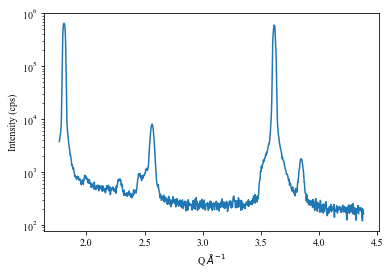

In [15]:
plt.semilogy(Q,xrd_data[10,:])
plt.xlabel('Q $\\AA^{-1}$')
plt.ylabel('Intensity (cps)')
plt.savefig(save_path+'test_data.png',dpi=300)

In [18]:
for i in range(xrd_data.shape[0]):
# for i in range(2):
    datatosave=np.vstack((tth,xrd_data[i,:])).T
    np.savetxt(save_path+samplename+'_Scan_'+str(i)+'.txt',datatosave)

In [14]:
datatosave

array([[  25.    , 3701.7284],
       [  25.04  , 4085.9826],
       [  25.08  , 4388.9958],
       ...,
       [  64.92  ,  162.2368],
       [  64.96  ,  187.2936],
       [  65.    ,  204.0572]])

In [7]:
xrd_data.shape,tth.shape

((72, 1001), (1001,))

## Load the data for analysis

In [4]:
xrd_data=np.genfromtxt(samplename+'_xrd_data.txt')
tth=np.genfromtxt(samplename+'_tth.txt')
Q=np.genfromtxt(samplename+'_Q.txt')
xy=np.genfromtxt(samplename+'_location.txt')

In [5]:
number_of_files=xrd_data.shape[0]

In [6]:
xy_xrd_data=np.hstack((xy,xrd_data))

In [7]:
xrd_data.shape,tth.shape,xy.shape

((72, 1001), (1001,), (72, 2))

### Plot necessary info

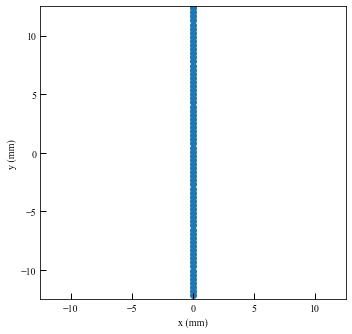

In [8]:
# scan_location plot
scan_location_xy=plt.figure(figsize=(5,4.75))
plt.scatter(xy[:,0],xy[:,1])

plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.xlim(-12.5,12.5)
plt.ylim(-12.5,12.5)
plt.tight_layout()

# scan_location_xy.savefig(save_path+'scan_location_xy.png',dpi=300)

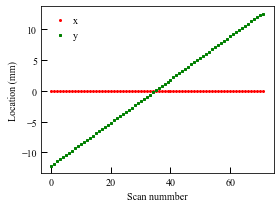

In [10]:
# scan_location plot
scan_location=plt.figure(figsize=(4,3))
plt.plot(xy[:,0],'ro',label='x',ms=2)
plt.plot(xy[:,1],'gs',label='y',ms=2)
plt.xlabel("Scan nummber")
plt.ylabel("Location (mm)")
plt.legend()
plt.tight_layout()

# scan_location.savefig(save_path+'scan_location.png',dpi=300)

In [9]:
xy

array([[  0.  , -12.15],
       [  0.  , -11.8 ],
       [  0.  , -11.45],
       [  0.  , -11.1 ],
       [  0.  , -10.75],
       [  0.  , -10.4 ],
       [  0.  , -10.05],
       [  0.  ,  -9.7 ],
       [  0.  ,  -9.35],
       [  0.  ,  -9.  ],
       [  0.  ,  -8.65],
       [  0.  ,  -8.3 ],
       [  0.  ,  -7.95],
       [  0.  ,  -7.6 ],
       [  0.  ,  -7.25],
       [  0.  ,  -6.9 ],
       [  0.  ,  -6.55],
       [  0.  ,  -6.2 ],
       [  0.  ,  -5.85],
       [  0.  ,  -5.5 ],
       [  0.  ,  -5.15],
       [  0.  ,  -4.8 ],
       [  0.  ,  -4.45],
       [  0.  ,  -4.1 ],
       [  0.  ,  -3.75],
       [  0.  ,  -3.4 ],
       [  0.  ,  -3.05],
       [  0.  ,  -2.7 ],
       [  0.  ,  -2.35],
       [  0.  ,  -2.  ],
       [  0.  ,  -1.65],
       [  0.  ,  -1.3 ],
       [  0.  ,  -0.95],
       [  0.  ,  -0.6 ],
       [  0.  ,  -0.25],
       [  0.  ,   0.1 ],
       [  0.  ,   0.45],
       [  0.  ,   0.8 ],
       [  0.  ,   1.15],
       [  0.  ,   1.5 ],


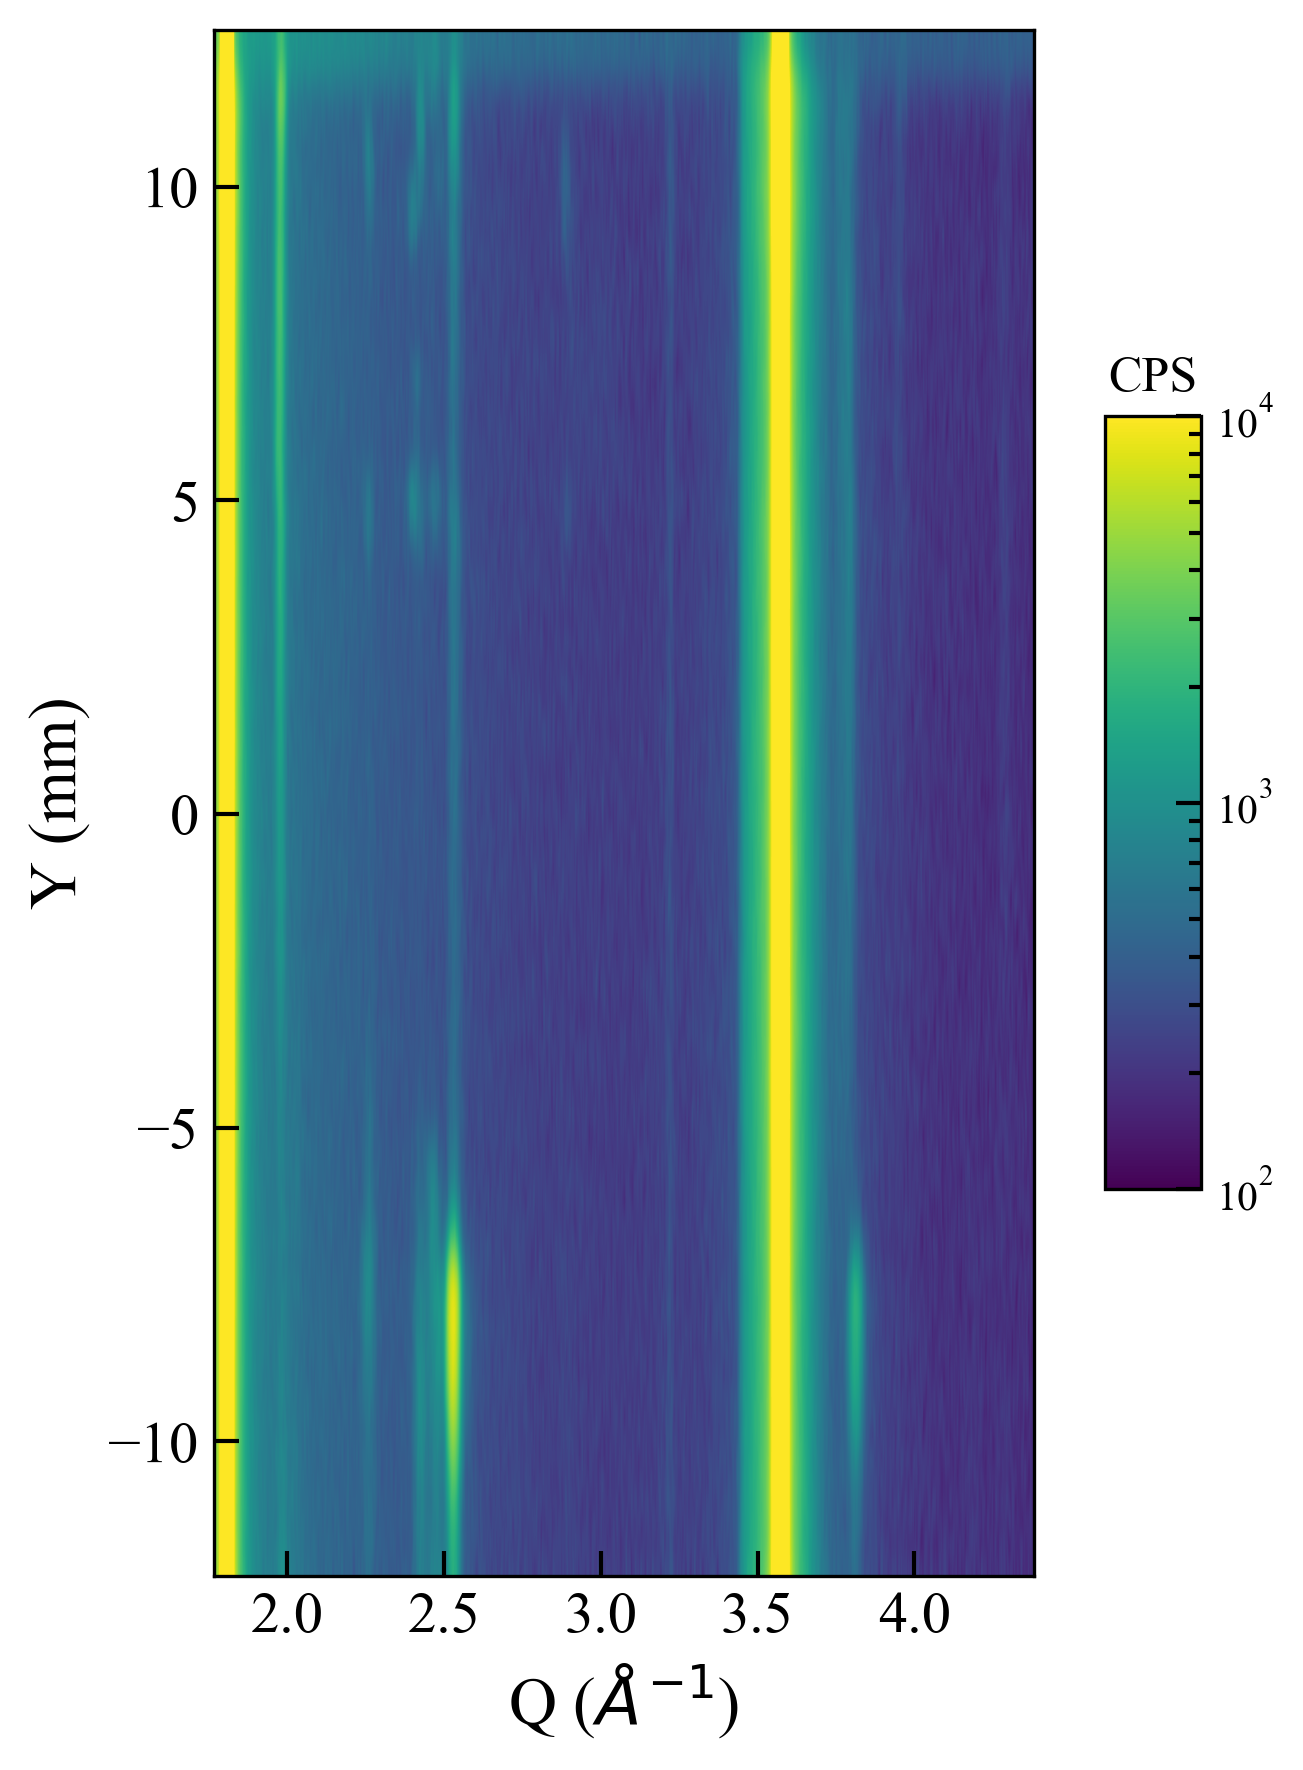

In [49]:
fig_image_show=plt.figure(figsize=(5,6),dpi=300)
# fig_image_show=plt.figure(figsize=(5,5),dpi=300)
data_to_plot=xy_xrd_data[:,2:]
plt.imshow(data_to_plot[:,:],
           origin='lower',
           cmap='viridis',
#            cmap='viridis',
           aspect=.2,
           norm=LogNorm(vmin=100,vmax=1e4),
           extent=(min(Q),max(Q),min(xy[:,1]),max(xy[:,1])),
           interpolation='bicubic'
                      )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Q ($ \\AA^{-1} $)',fontsize=16)
plt.ylabel('Y (mm)',fontsize=16)
clb = plt.colorbar(shrink=0.5,aspect=8)
clb.ax.set_title('CPS')
# plt.title(samplename,y=1.05);
plt.tight_layout()


In [50]:
fig_image_show.savefig(save_path+'fig_image_show_new.png',dpi=300)

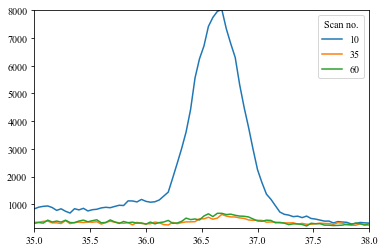

In [15]:
plt.figure()
plt.plot(tth,xy_xrd_data[10,2:],label='10')
plt.plot(tth,xy_xrd_data[35,2:],label='35')
plt.plot(tth,xy_xrd_data[60,2:],label='60')
plt.xlim(35,38)
plt.ylim(150,8000)
plt.legend(title='Scan no.');

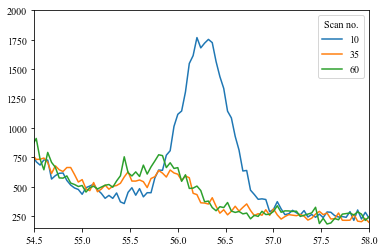

In [75]:
plt.figure()
plt.plot(tth,xy_xrd_data[10,2:],label='10')
plt.plot(tth,xy_xrd_data[35,2:],label='35')
plt.plot(tth,xy_xrd_data[60,2:],label='60')
plt.xlim(54.5,58)
plt.ylim(150,2000)
plt.legend(title='Scan no.');

In [17]:
data_sum_2=xrd_data[101:,:].sum(axis=0)
data_sum=xrd_data[25:75,:].sum(axis=0)

In [39]:
# np.savetxt(save_path+samplename+'_xrd_data_sum.txt',data_sum,comments='Added counts from all the scans')

In [38]:
data_sum_2.shape

(1001,)

In [ ]:
data_to_plot[]

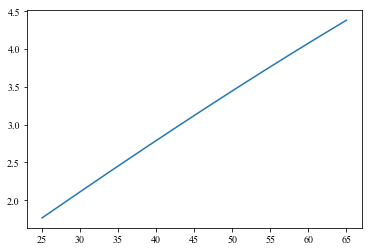

In [133]:
plt.plot(tth,Q,'-')

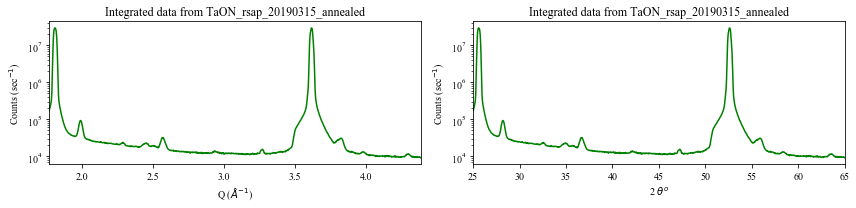

In [19]:
fig_integrated=plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
# plt.semilogy(tth,data_sum[:],'k-',alpha=0.3)
plt.semilogy(Q[:],data_sum[:],'g-',alpha=1)
# plt.semilogy(tth[:],data_sum[:]*10,'r+',alpha=0.5)
# plt.semilogy(tth,data_sum_2[:])
plt.xlim(min(Q),max(Q))
# plt.ylim(3.5e3,5e4)
plt.xlabel('Q ($ \\AA^{-1} $)')
plt.ylabel('Counts (sec$^{-1}$)')
plt.title('Integrated data from '+ samplename)

plt.subplot(1,2,2)
plt.semilogy(tth[:],data_sum[:],'g-',alpha=1)
plt.xlim(min(tth),max(tth))
# plt.ylim(3.5e3,5e4)
plt.xlabel('2 $\\theta^o $')
plt.ylabel('Counts (sec$^{-1}$)')
plt.title('Integrated data from '+ samplename)
plt.tight_layout()
# fig_integrated.savefig(save_path+'fig_integrated.png',dpi=300)

In [82]:
np.savetxt(save_path+samplename+'data_sum.txt',data_sum)

Text(0.5, 1.0, 'Integrated data from TaON_rsap_20190315_annealed')

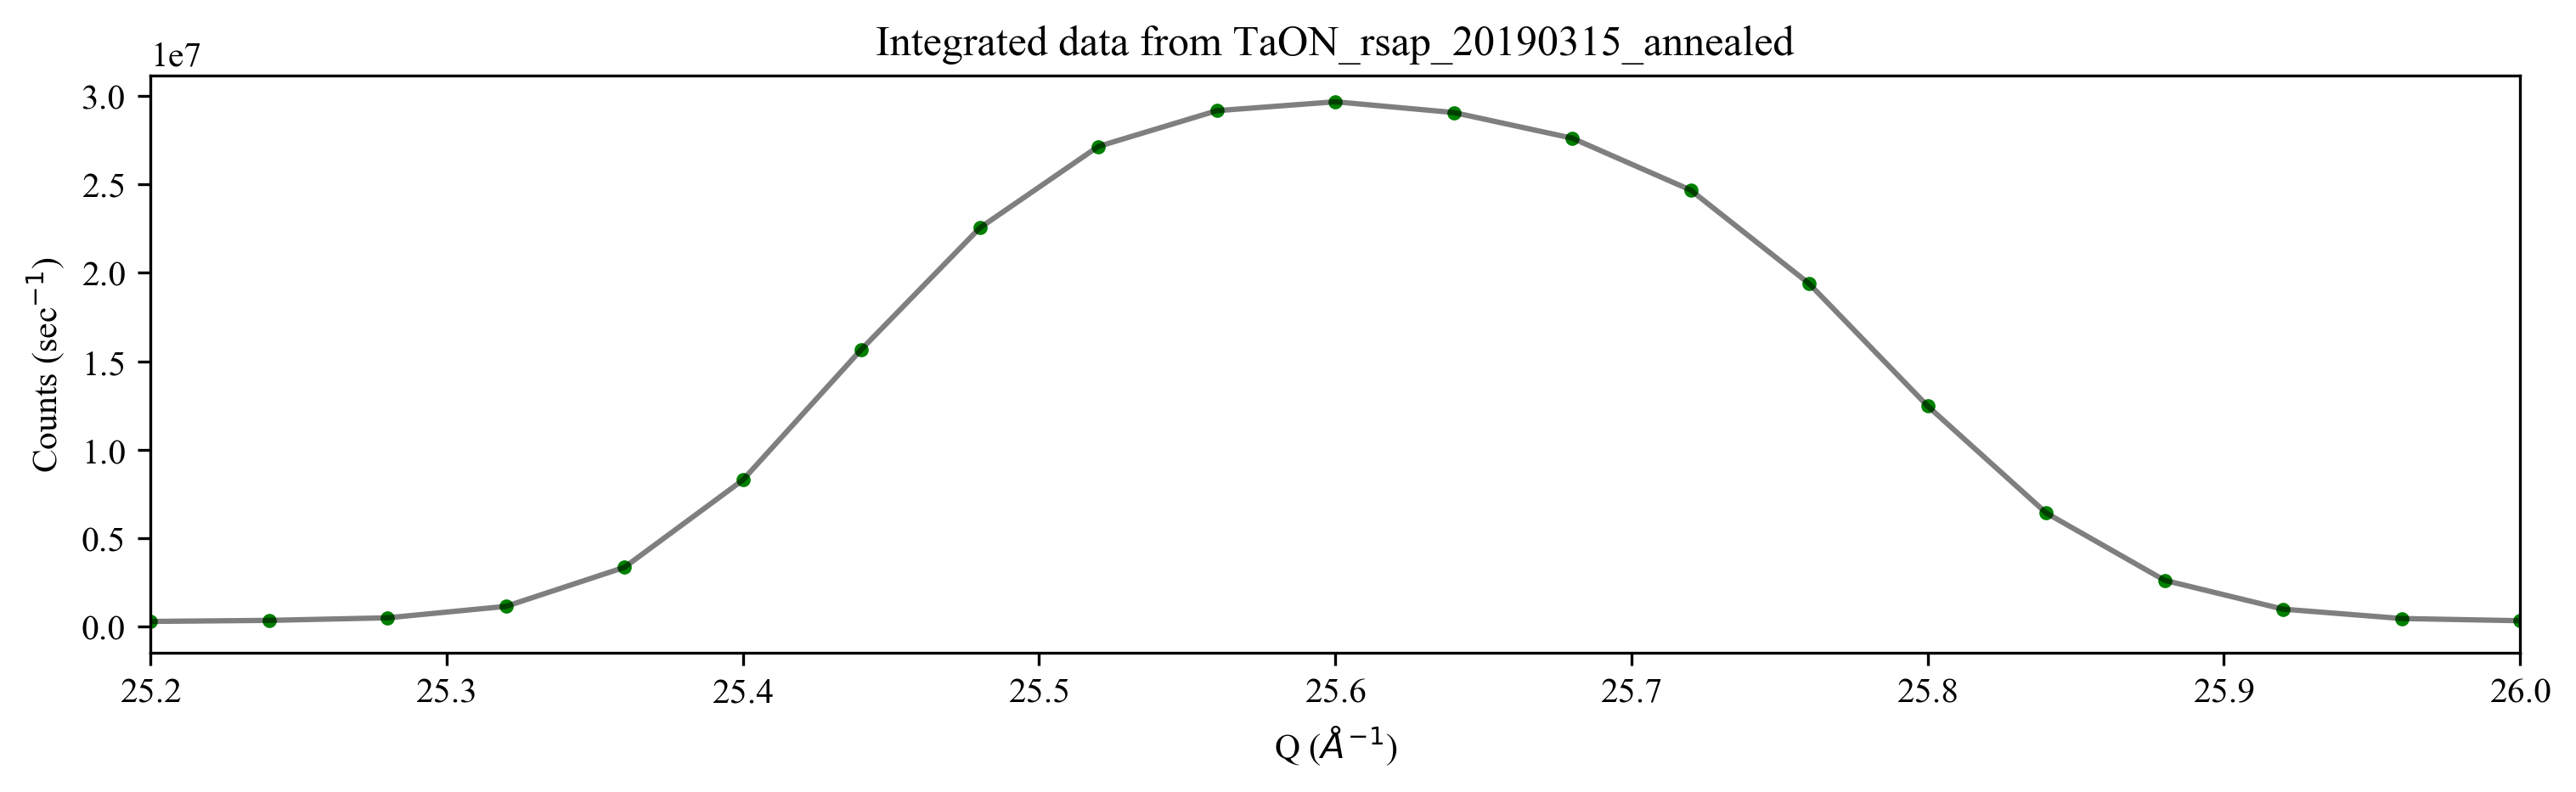

In [37]:
plt.figure(figsize=(12,3),dpi=300)
plt.plot(tth[:],data_sum[:],'g.',alpha=1)
plt.plot(tth[:],data_sum[:],'k-',alpha=.5)
# plt.semilogy(tth[:],data_sum[:]*10,'r+',alpha=0.5)
# plt.semilogy(tth,data_sum_2[:])
plt.xlim(min(tth)+.2,min(tth)+1)
# plt.ylim(3.5e3,5e4)
plt.xlabel('Q ($ \\AA^{-1} $)')
plt.ylabel('Counts (sec$^{-1}$)')
plt.title('Integrated data from '+ samplename)

## Clustering

In [13]:
# Import data for clustering
xrd_data=np.genfromtxt(save_path+samplename+'_xrd_data.txt')
Q=np.genfromtxt(save_path+samplename+'_Q.txt')
location=np.genfromtxt(save_path+samplename+'_location.txt')

In [14]:
xrd_data.shape,Q.shape,location.shape

((72, 1001), (1001,), (72, 2))

In [15]:
# Reasign the data to necessary variable
xrd_xy=location
datas=xy_xrd_data[:,2:]
# datas=xrd_data[25:70,1700:4000]
rows,cols=datas.shape
print(rows,cols)

72 1001


In [16]:
ones=np.ones_like(datas[10,:])
Q.shape, ones.shape

((1001,), (1001,))

### Plot the texture data with chi axis

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


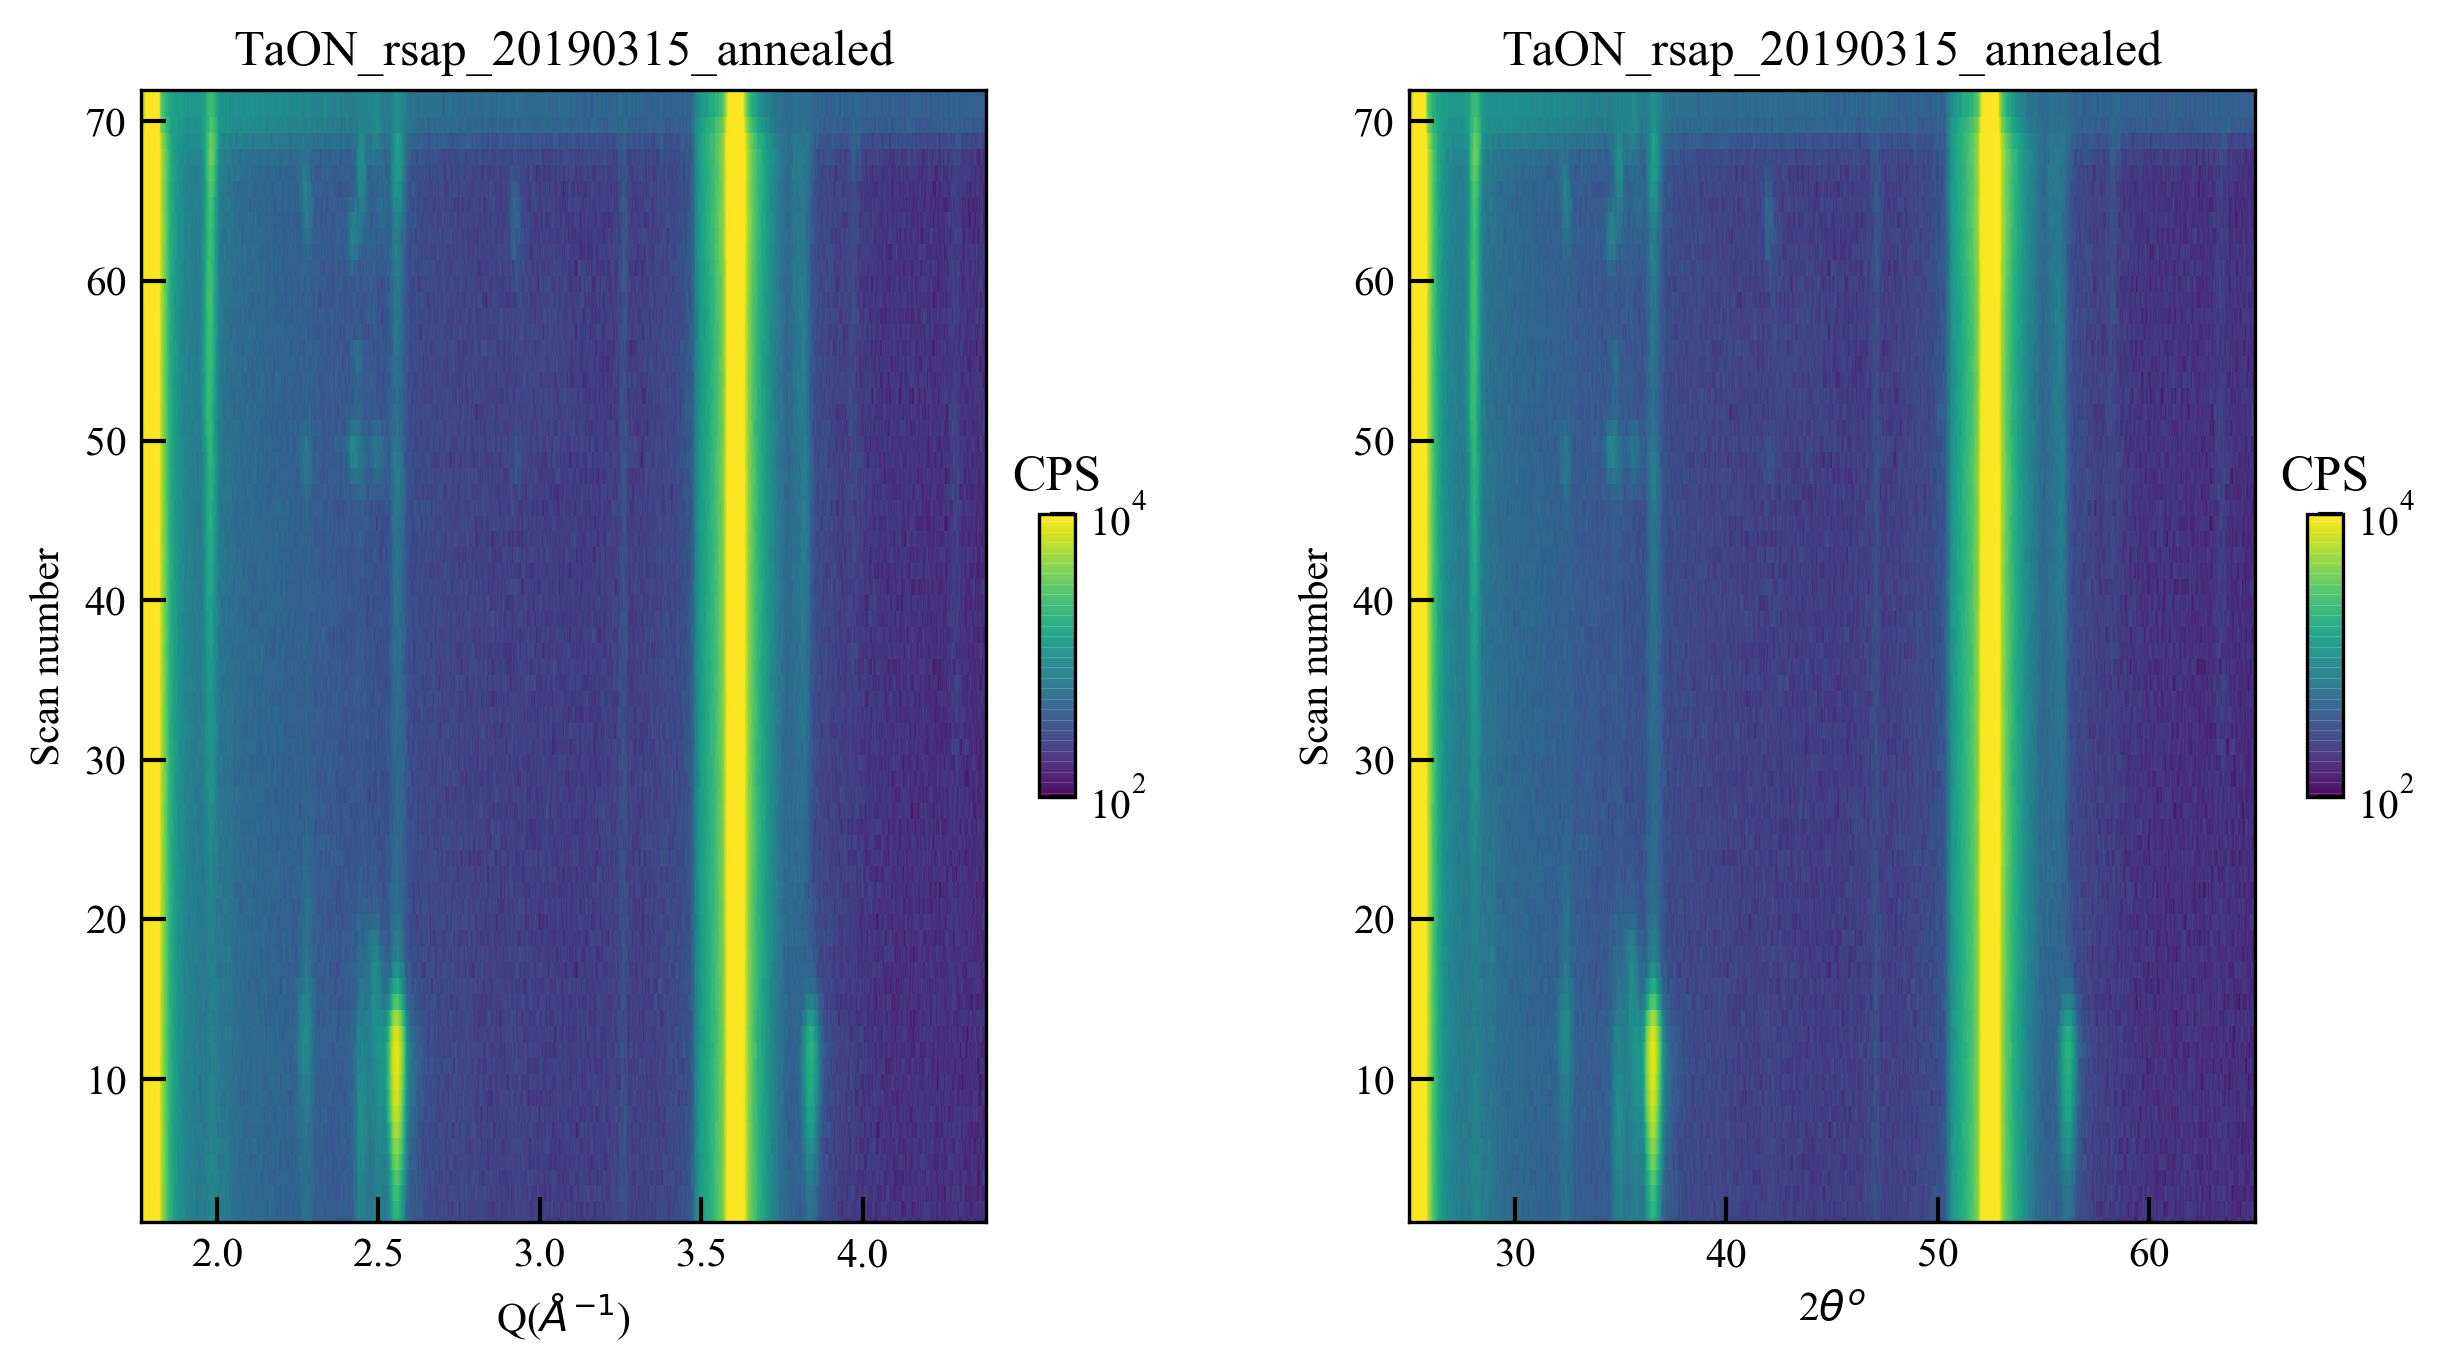

In [17]:
#%% Plot the XRD data with q axis

plot_data=plt.figure(figsize=(10,5),dpi=300)
plt.subplot(1,2,1)
# for i in range(500,502):
count=1
for i in range(0,rows):
    plt.scatter(Q,
                ones*count,
                marker='|',
                norm=LogNorm(vmin=100,vmax=1e4),
#                 norm=LogNorm(vmin=1e2,vmax=1e8),
                cmap='viridis',
#                 cmap='prism',
                s=170,
                c=datas[i,:],
                alpha=.8)
    count+=1
plt.xlim(min(Q),max(Q))
plt.ylim(1,rows)
clb = plt.colorbar(shrink=0.25,aspect=8)
clb.ax.set_title('CPS')
# plt.colorbar()
#clb.ax.set_title('$Counts\ (a.u)$')
plt.xlabel('Q($\\AA^{-1}$)')
plt.ylabel('Scan number')
plt.title(samplename)
plt.subplot(1,2,2)
count=1
for i in range(0,rows):
    plt.scatter(tth,
                ones*count,
                marker='|',
                norm=LogNorm(vmin=100,vmax=1e4),
#                 norm=LogNorm(vmin=1e2,vmax=1e8),
                cmap='viridis',
#                 cmap='prism',
                s=170,
                c=datas[i,:],
                alpha=.8)
    count+=1
plt.xlim(min(tth),max(tth))
plt.ylim(1,rows)
clb = plt.colorbar(shrink=0.25,aspect=8)
clb.ax.set_title('CPS')
# plt.colorbar()
#clb.ax.set_title('$Counts\ (a.u)$')
plt.xlabel('2$\\theta^{o}$')
plt.ylabel('Scan number')
plt.title(samplename)
plt.show()

In [135]:
plot_data.savefig(save_path+'/'+samplename+'_'+'plot_data.png',dpi=300,bbox_inches='tight')

In [13]:
alldata = np.log(datas.T)

In [7]:
import skfuzzy as fuzz

In [81]:
#%% Set up fuzzy clustering loop and plot
alldata = datas.T
np.random.seed(1)
npts_n=30
npts_m=100
m=np.linspace(1.1,3,npts_m)
fpcs = np.ones((npts_m,npts_n))
np.random.seed(1)
for i in range(m.shape[0]):
    for j in range(1,npts_n):
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            alldata, j,m[i], error=.0000001, maxiter=10000000, init=None)
        fpcs[i,j]=fpc
#         print(j, sep=',', end=',', flush=True)
    print('m = '+str('% 2.2f' %m[i])+'\n', sep=',', end=',', flush=True)


m = 1.1
,m = 1.1191919191919193
,m = 1.1383838383838385
,m = 1.1575757575757577
,m = 1.176767676767677
,m = 1.1959595959595961
,m = 1.2151515151515153
,m = 1.2343434343434345
,m = 1.2535353535353537
,m = 1.272727272727273
,m = 1.291919191919192
,m = 1.3111111111111111
,m = 1.3303030303030303
,m = 1.3494949494949495
,m = 1.3686868686868687
,m = 1.387878787878788
,m = 1.4070707070707071
,m = 1.4262626262626263
,m = 1.4454545454545455
,m = 1.4646464646464648
,m = 1.483838383838384
,m = 1.5030303030303032
,m = 1.5222222222222221
,m = 1.5414141414141413
,m = 1.5606060606060606
,m = 1.5797979797979798
,m = 1.598989898989899
,m = 1.6181818181818182
,m = 1.6373737373737374
,m = 1.6565656565656566
,m = 1.6757575757575758
,m = 1.694949494949495
,m = 1.7141414141414142
,m = 1.7333333333333334
,m = 1.7525252525252526
,m = 1.7717171717171718
,m = 1.790909090909091
,m = 1.8101010101010102
,m = 1.8292929292929294
,m = 1.8484848484848486
,m = 1.8676767676767678
,m = 1.886868686868687
,m = 1.9060606060

In [161]:
np.savetxt('fpcs_2D.txt',fpcs,comments='m from 1.1 to 3 in rows, 30 clusters in columns.')

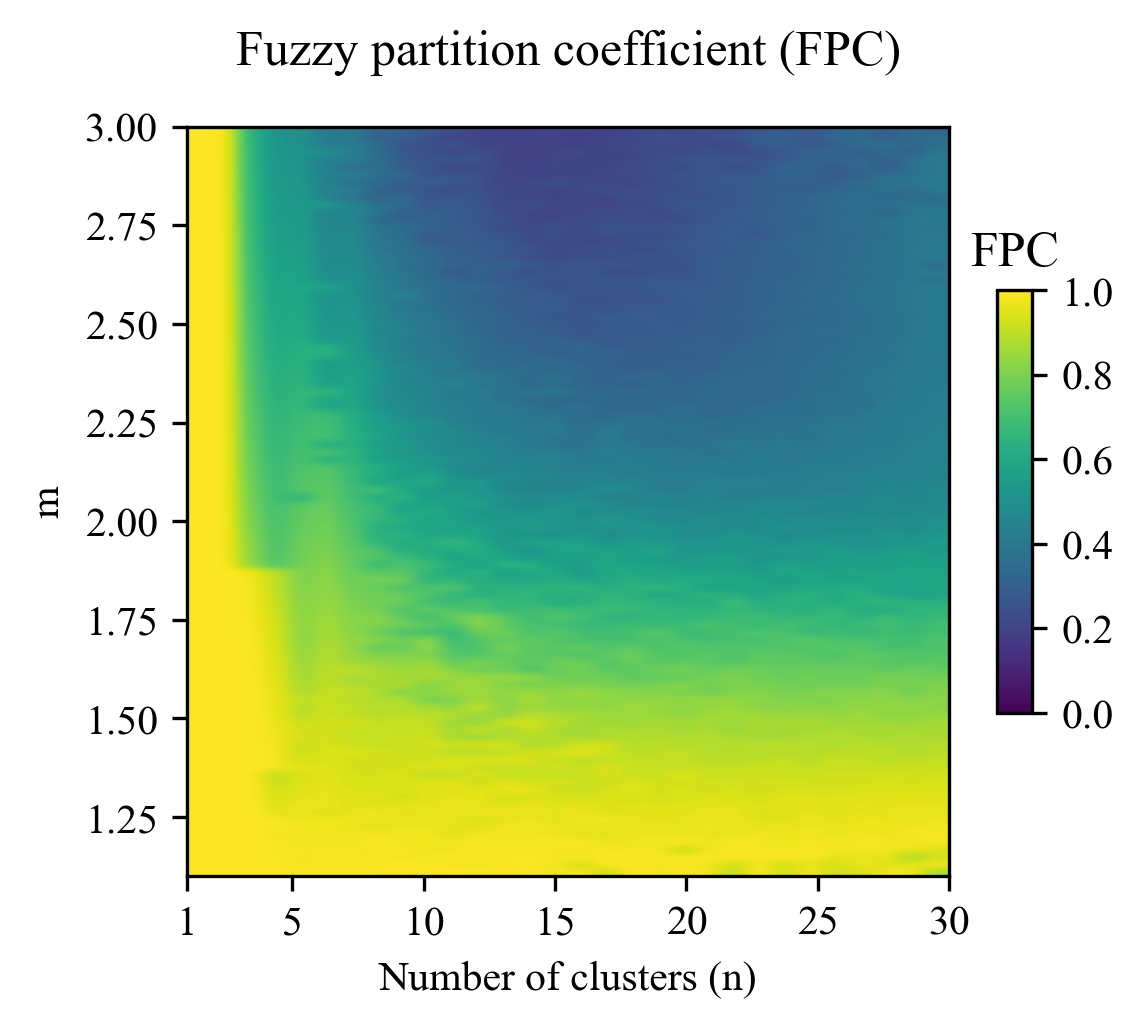

In [179]:
fig_fpcs_show=plt.figure(figsize=(4,5),dpi=300)
plt.imshow(fpcs,
           origin='lower',
           cmap='viridis',
#            cmap='gnuplot',
#            cmap='RdGy_r',
           aspect=15,
           norm=mpl.colors.Normalize(vmin=0,vmax=1.),
           extent=(1,npts_n,min(m),max(m)),
           interpolation='gaussian'
                       )
plt.xlabel('Number of clusters (n)')
plt.ylabel('m')
plt.xticks([1,5,10,15,20,25,30])
# plt.xlim(0,npts_n)
clb = plt.colorbar(shrink=0.3,aspect=12)
clb.ax.set_title('FPC')
plt.title('Fuzzy partition coefficient (FPC)',y=1.05);
plt.tight_layout()

In [158]:
pwd

'D:\\Box Sync\\TaON\\TiON_gradient_20190315__rSap_annealed\\TaON_gradient_20190315_rSap_annealed_Analysis'

In [159]:
fig_fpcs_show.savefig('fig_fpcs_show.png', dpi=300)

In [180]:
#%% Set up fuzzy clustering loop and plot
alldata = datas.T
np.random.seed(1)
fpcs = []
ps=[]
ones=np.ones_like(datas[10,:])
np.random.seed(1)
for ncenters in range(1,21):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters,2, error=.00001, maxiter=100000, init=None)
    fpcs.append(fpc)
    ps.append(p)
    cluster_membership = np.argmax(u, axis=0)
    print(ncenters, sep=',', end=',', flush=True)

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,

Text(0.5, 0, 'Number of clusters')

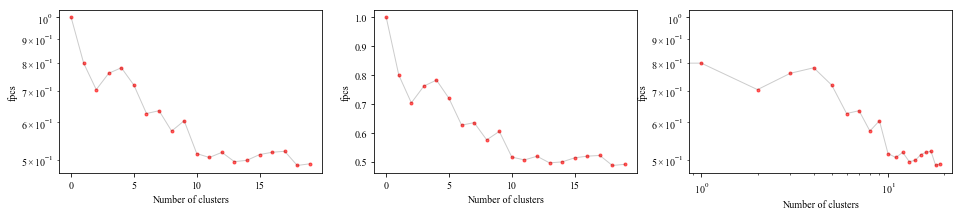

In [181]:
#%%Plotting
plot_fpcs=plt.figure(figsize=(16,3))
plt.subplot(1,3,1)
plt.semilogy(fpcs,'r.',alpha=0.6)
plt.semilogy(fpcs,'k-',lw=1,alpha=0.2)
plt.ylabel('fpcs')
plt.xlabel('Number of clusters')
# plt.ylim(0.1,1)
plt.subplot(1,3,2)
plt.plot(fpcs,'r.',alpha=.6)
plt.plot(fpcs,'k-',lw=1,alpha=0.2)
plt.ylabel('fpcs')
plt.xlabel('Number of clusters')
# plt.ylim(0.1,1)
plt.subplot(1,3,3)
plt.loglog(fpcs,'r.',alpha=.6)
plt.loglog(fpcs,'k-',lw=1,alpha=0.2)
plt.ylabel('fpcs')
plt.xlabel('Number of clusters')
# plt.ylim(0.1,1)

In [182]:
plot_fpcs.savefig(save_path+'/'+samplename+'_'+'plot_fpcs.png',dpi=300,bbox_inches='tight')

### Run the clustering

In [185]:
#%% Run th clustering with the number of clusters identified with best fpcs.
k=4 #number of clusters
np.random.seed(1)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, k, 2, error=.00001, maxiter=100000, init=None)   
# the value 'u' contains the information about the membership of the each data set in each cluster.
membership=u.T

In [15]:
np.savetxt(save_path+'/'+samplename+'_'+'membership.txt',membership)

In [12]:
membership_1=np.copy(membership)

In [14]:
membership_1[:,0]=membership[:,2]
membership_1[:,1]=membership[:,0]
membership_1[:,2]=membership[:,3]
membership_1[:,3]=membership[:,1]

### Load the clustering info.

In [8]:
#%% Load the clustering info.
membership=np.genfromtxt(save_path+'/'+samplename+'_'+'membership.txt')
Q=np.genfromtxt(save_path+samplename+'_Q.txt')
k=membership.shape[1]
ones=np.ones_like(datas[10,:])
rows,cols=datas.shape

In [17]:
save_path

'D:\\Box Sync\\TaON\\TiON_gradient_20190315__rSap_annealed\\TaON_gradient_20190315_rSap_annealed_Analysis\\\\'

In [18]:
np.amax(datas),np.amin(datas),tth.shape

(725854.7526, 100.0516, (1001,))

In [19]:
Q

array([1.76545528, 1.76823494, 1.77101439, ..., 4.37784325, 4.3802454 ,
       4.38264703])

In [9]:
import matplotlib.colors as colors

### Plot the info

In [28]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

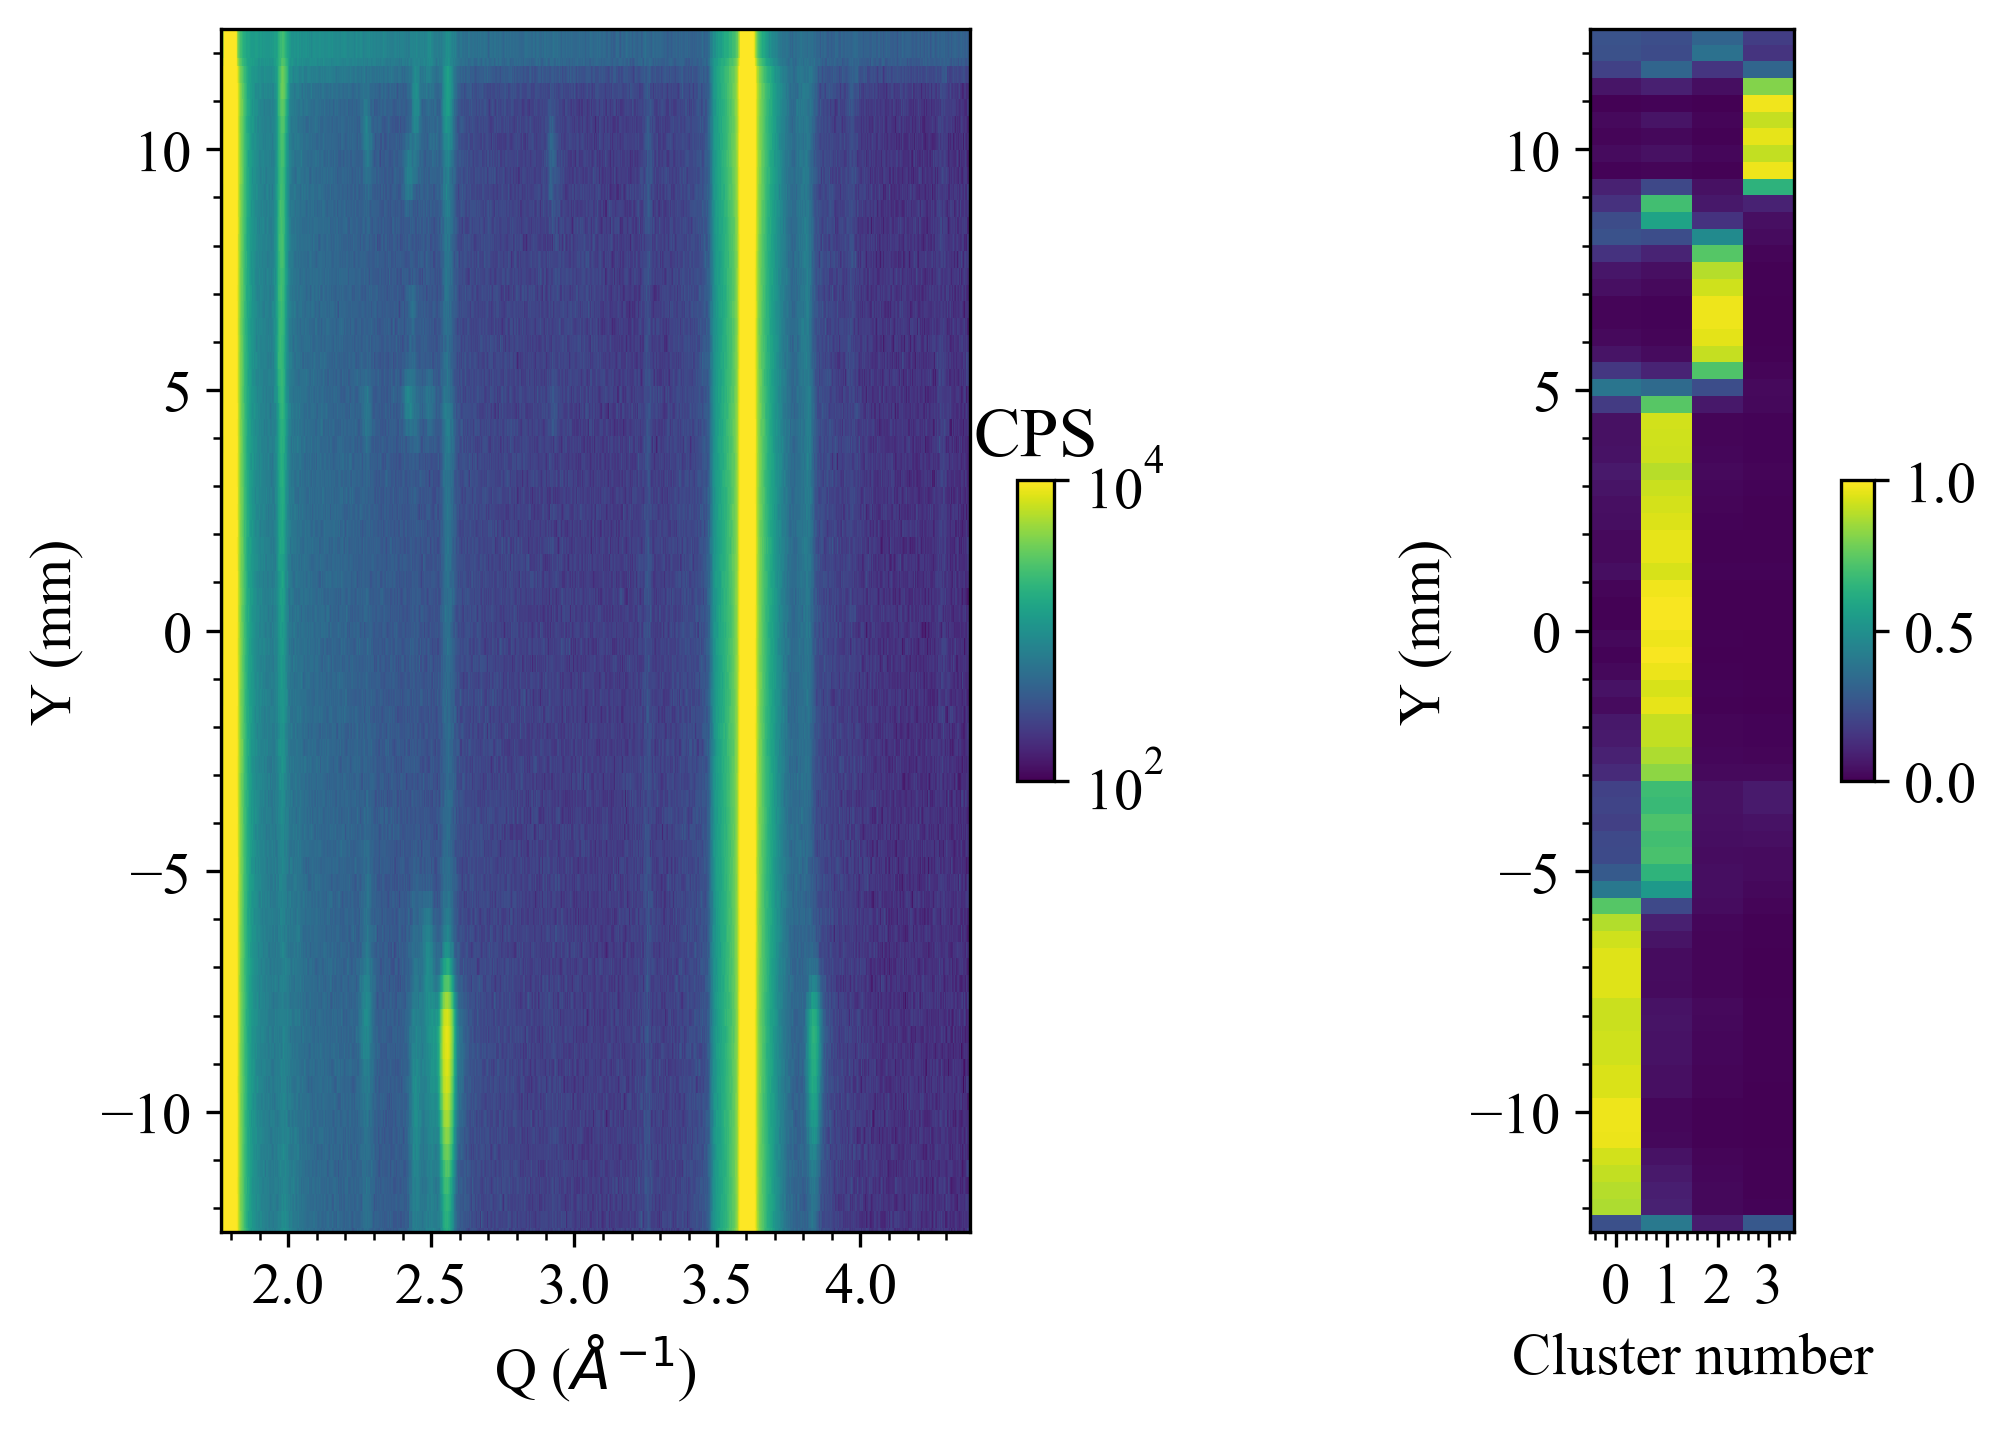

In [35]:
#%% 
plot_data_cluster=plt.figure(figsize=(7,5),dpi=300)
plt.subplot(1,2,1)
count=0 
ns=rows#numberof scans to plot

for i in range(0,ns):
    plt.scatter(Q,
                ones*xy[i,1],
                marker='|',
                norm=LogNorm(vmin=100,vmax=1e4),
                cmap='viridis',
                s=200,
                c=datas[i,:],
                alpha=1)
    count+=1
plt.xlim(min(Q),max(Q))
plt.xticks(np.arange(2, max(Q), 0.5))
plt.minorticks_on()
# plt.ylim(0,ns)
plt.ylim(-12.5,12.5)
clb=plt.colorbar(shrink=0.25,aspect=8)
clb.ax.set_title('CPS')
# plt.xlabel('$2\\theta^{o}$)')
plt.xlabel('Q ($\\AA^{-1}$)')
# plt.ylabel('XRD Scan number')
plt.ylabel('Y (mm)')
plt.subplot(1,2,2)
plt.imshow(membership,origin=rows,aspect=17*k/ns,cmap='viridis',vmin=0,vmax=1,extent=(-0.5,3.5,-12.5,12.5))
# plt.imshow(membership,origin='top_left',aspect=2.5*k/ns,cmap='Greens',norm=LogNorm(),vmin=0.2,vmax=1)
plt.xlabel('Cluster number')
plt.ylabel('Y (mm)')
plt.xticks(np.arange(0, 3.5, 1.0))
plt.minorticks_on()
# plt.ylim(0,ns)
# plt.ylim(-12.5,12.5)
clb = plt.colorbar(shrink=0.25,aspect=9)
clb.ax.get_yaxis().labelpad = 50
clb.ax.set_title('',rotation=0)
plt.tight_layout()

In [36]:
plot_data_cluster.savefig(save_path+'/'+samplename+'_'+'plot_data_cluster_01.png',dpi=300,bbox_inches='tight')

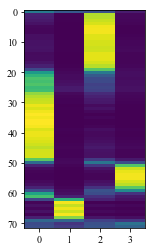

In [194]:
plt.imshow(membership,aspect=0.1)

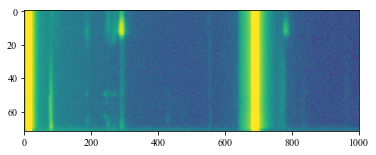

In [195]:
plt.imshow(datas,aspect=5,norm=LogNorm(vmin=50,vmax=1e4))

In [196]:
single_col_membership=np.zeros((membership.shape[0],1))
for i in range(membership.shape[0]):
    ind = np.unravel_index(np.argmax(membership[i,:], axis=0), membership[i,:].shape)
    single_col_membership[i]=ind

In [197]:
i=50
np.unravel_index(np.argmax(membership[i,:], axis=0), membership[i,:].shape)

(2,)

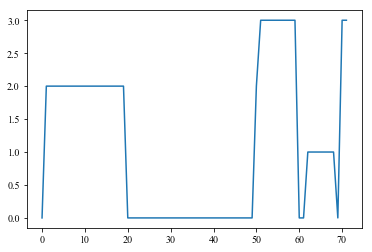

In [198]:
plt.plot(single_col_membership)

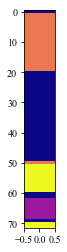

In [199]:
plt.imshow(single_col_membership,aspect=.1,cmap='plasma')

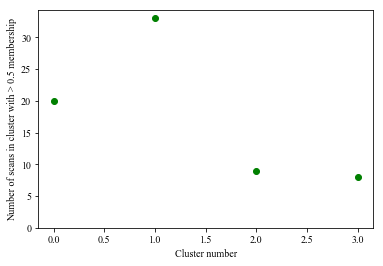

In [23]:
#%% Scan the membershop array to see which clusters got higher values
point_in_clusters=np.zeros((rows,k))
for i in range(k):
    count=1
    for j in range(rows):
        if membership[j,i]>0.5:
            point_in_clusters[count,i]=j
            count+=1
    point_in_clusters[0,i]=count
    if count==1:
        print(i, sep=',', end=',', flush=True)
plot_point_in_clusters=plt.figure()
plt.plot(point_in_clusters[0,:],'go')
plt.ylim(0)
plt.xlabel('Cluster number')
plt.ylabel('Number of scans in cluster with > 0.5 membership');

In [201]:
plot_point_in_clusters.savefig(save_path+'/'+samplename+'_'+'plot_point_in_clusters.png',dpi=300,bbox_inches='tight')

(1.7654552800045566, 4.382647026766337)

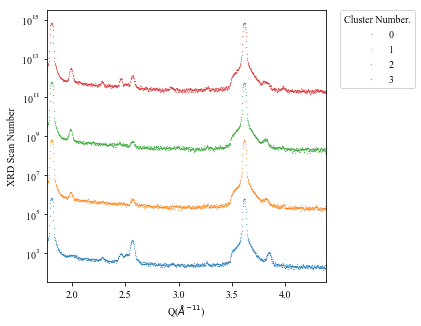

In [24]:
#%% Plot sample data from each cluster
mul=1 #Multiplication factor for shift
add=.3
plot_clusters_XRD=plt.figure(figsize=(5,5))
[plt.semilogy(Q,datas[membership[:,i].argmax(axis=0),:]*1000**i,'.',ms=.5,label=i) for i in range(k)]
# plt.xlabel('$2\\theta^{o}$')
plt.xlabel('Q($\\AA^{-11}$)')
plt.ylabel('XRD Scan Number')
plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlim(min(Q),max(Q))
#plt.colorbar()

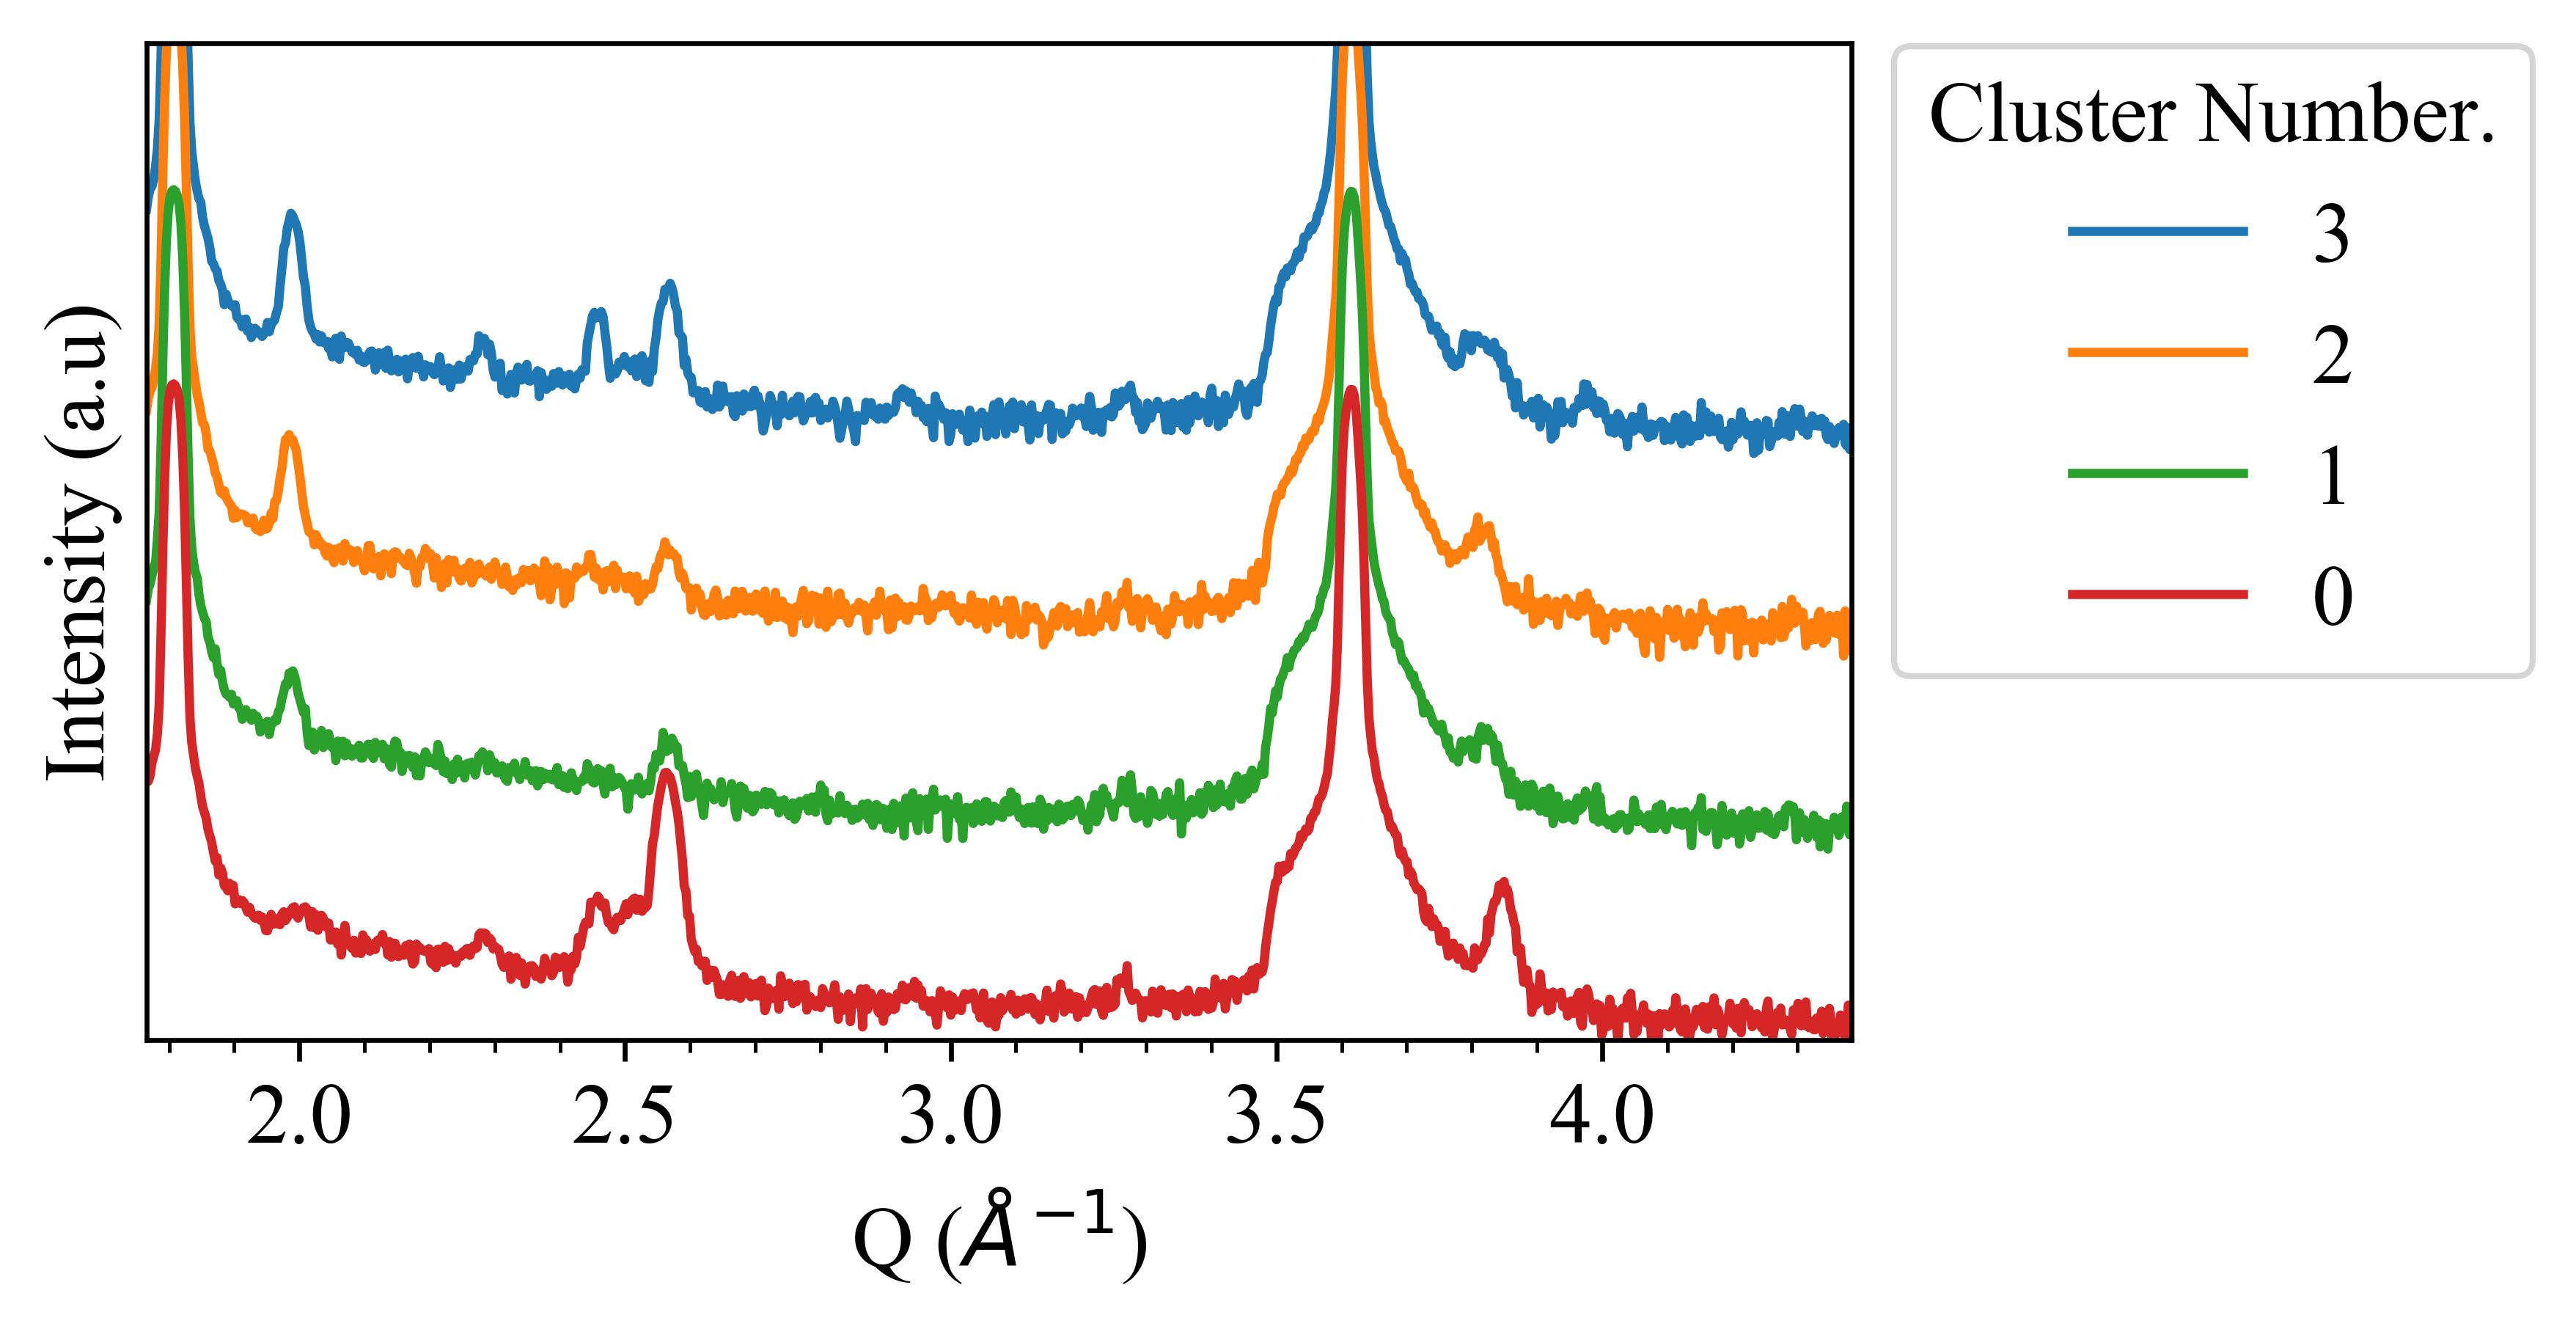

In [46]:
#%% Plot sample data from each cluster
mul=1 #Multiplication factor for shift
add=.3
plot_clusters_XRD=plt.figure(figsize=(5,3),dpi=600)
[plt.semilogy(Q,datas[membership[:,i].argmax(axis=0),:]*12**i*20,'-',lw=1.5,label=i) for i in (3,2,1,0)]
# plt.xlabel('$2\\theta^{o}$')

plt.xlabel('Q ($\\AA^{-1}$)')
plt.ylabel('Intensity (a.u)')
# plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.legend(title="Cluster Number.",bbox_to_anchor=(1., 1.04))
plt.ylim(3000,1e9);
# plt.xlim(2,3.3)
plt.yticks([])
plt.xlim(min(Q),max(Q));
plt.minorticks_on()

#plt.colorbar()

In [39]:
plot_clusters_XRD.savefig(save_path+'/'+samplename+'_'+'plot_clusters_XRD_1.png',dpi=300,bbox_inches='tight')

In [5]:
min(Q), max(Q)

(1.7654552800045566, 4.382647026766337)

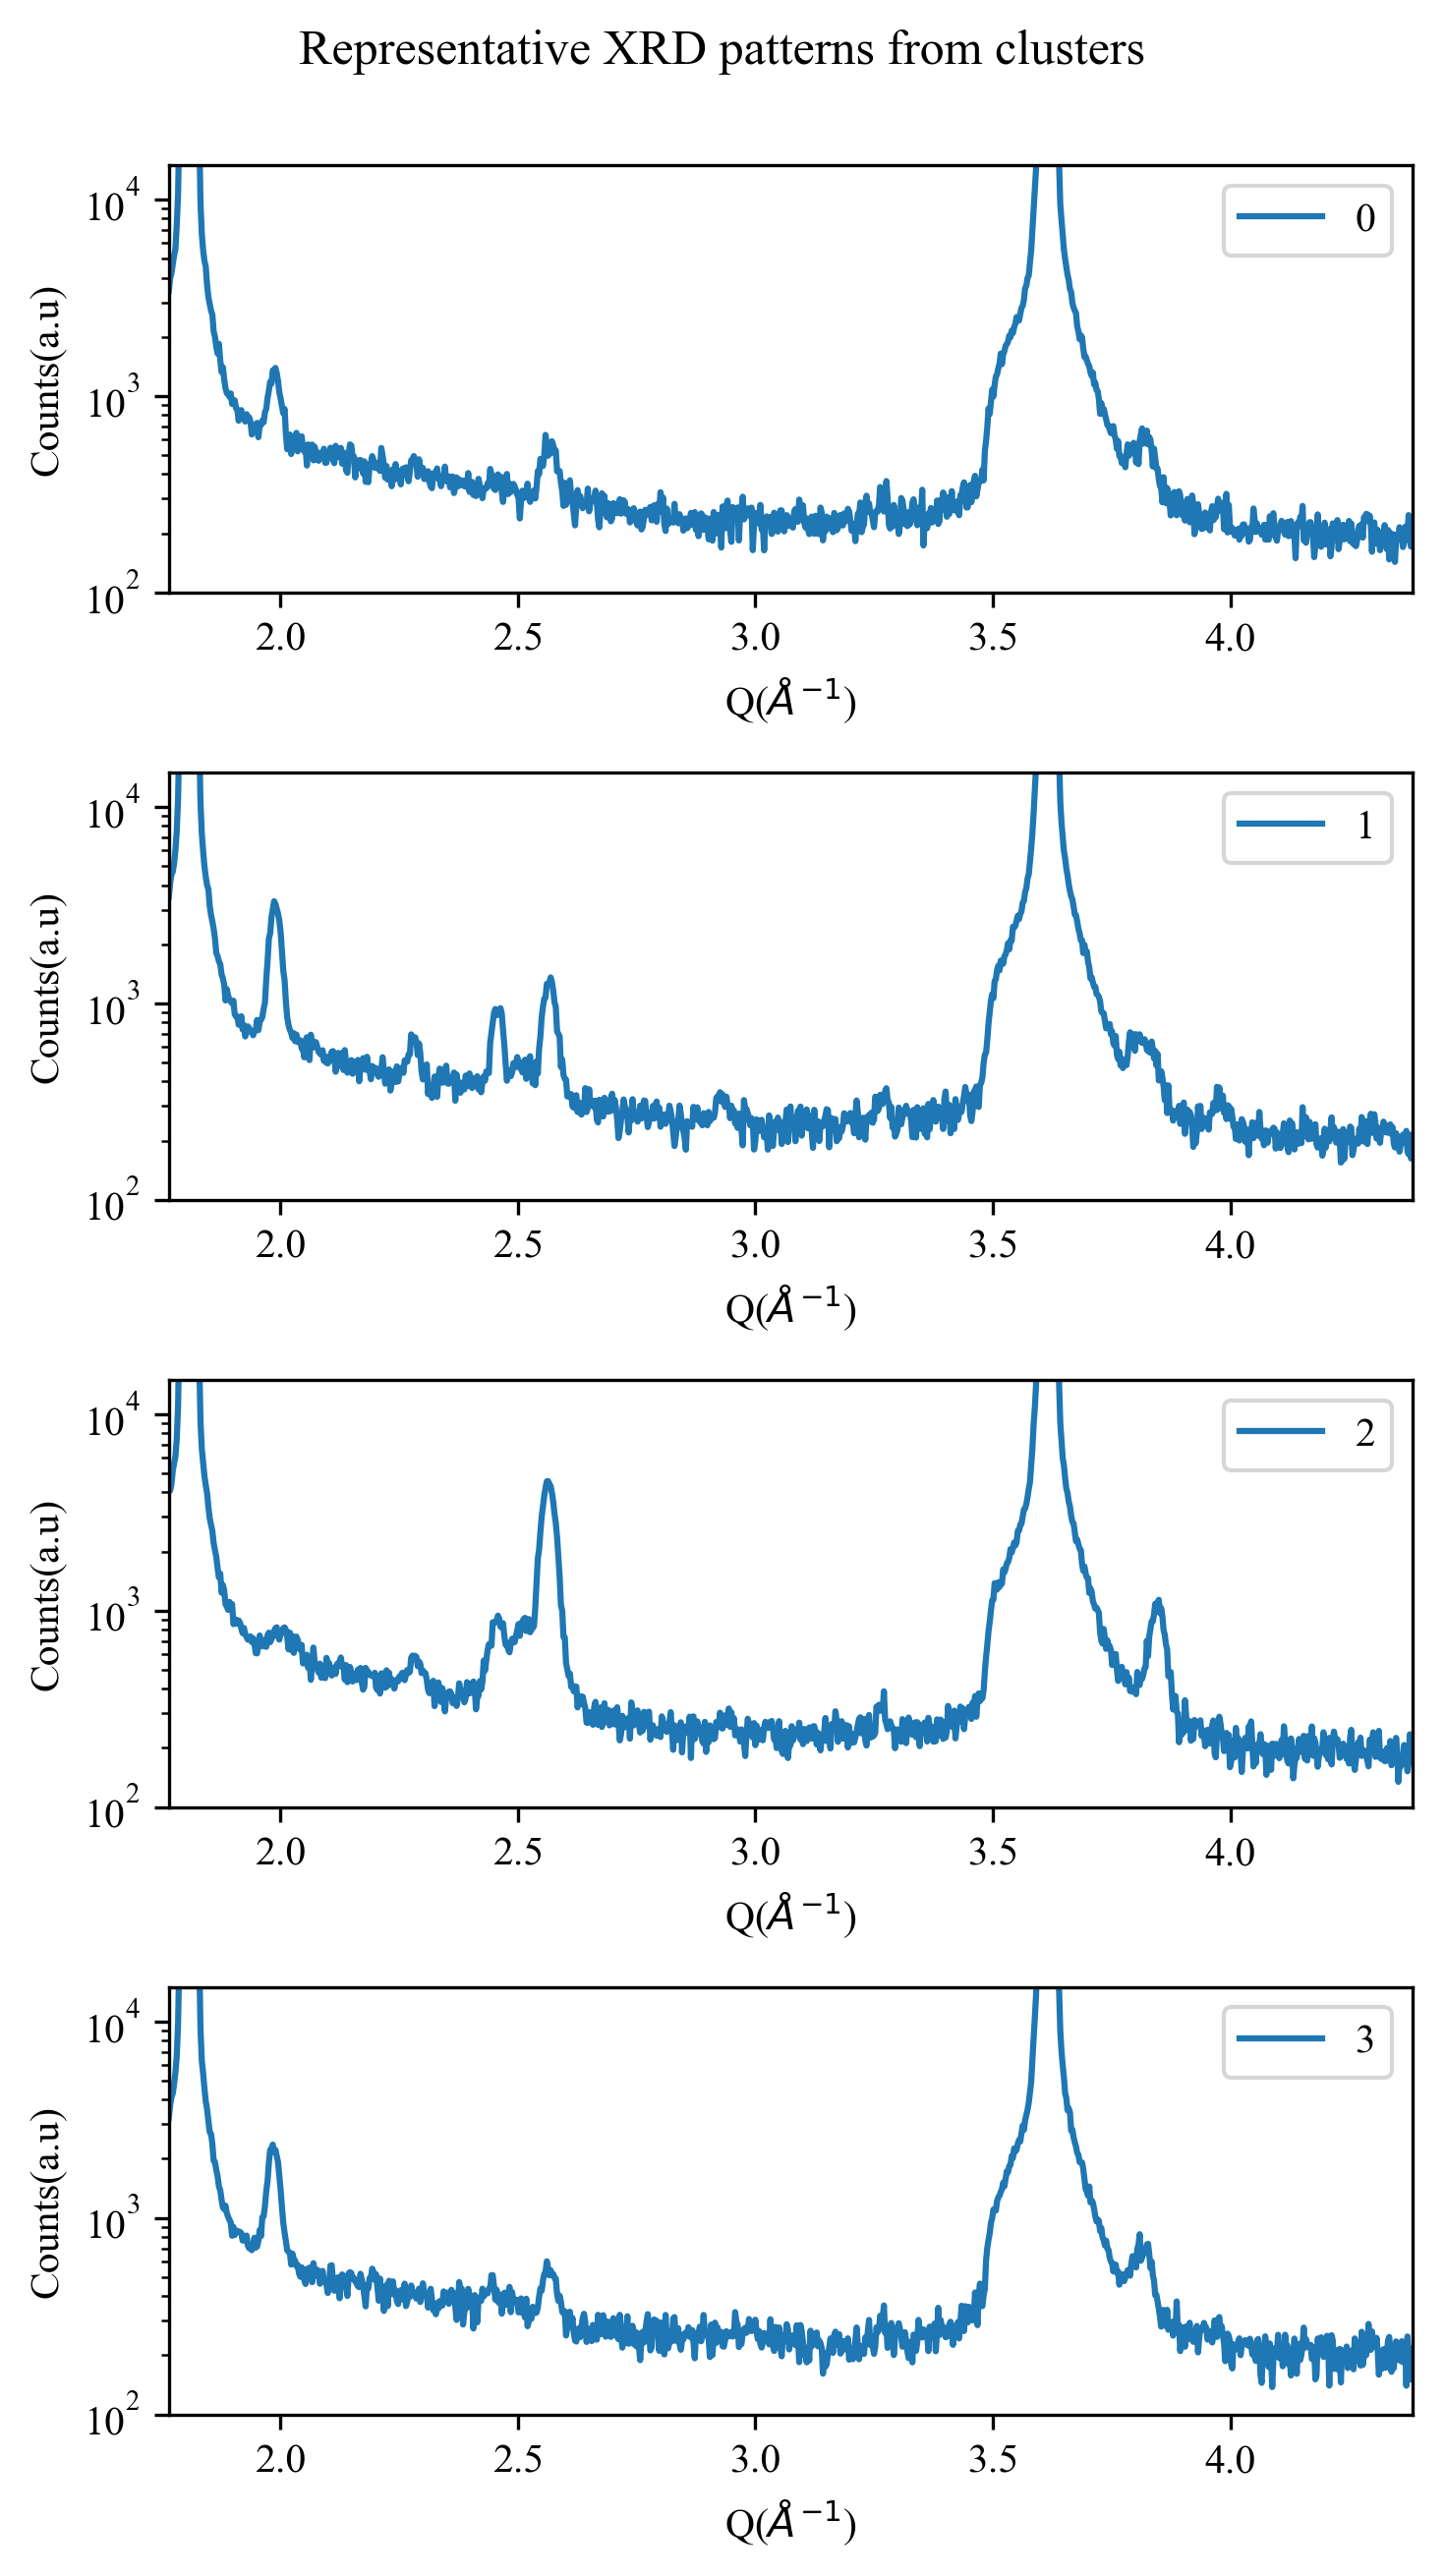

In [226]:
#%%
plot_clusters_XRD_seperate=plt.figure(figsize=(5,10),dpi=300)
for i in range(k):
    plt.subplot(5,1,i+1)
    plt.semilogy(Q,datas[membership[:,i].argmax(axis=0),:],'-',ms=.5,label=i)
    plt.xlim(min(Q),max(Q))
    plt.ylim(20) 
    plt.legend()
#     plt.xlabel('$2 \\theta^{o}$')
    plt.xlabel('Q($\\AA^{-1}$)')
    plt.ylabel('Counts(a.u)')
    plt.ylim(100,15000)
plt.tight_layout()
plt.suptitle('Representative XRD patterns from clusters',y=1.03,fontsize=12)
plt.show()

In [227]:
#%%
plot_clusters_XRD_seperate.savefig(save_path+'/'+samplename+'_'+'plot_clusters_XRD_seperate.png',dpi=300,bbox_inches='tight')

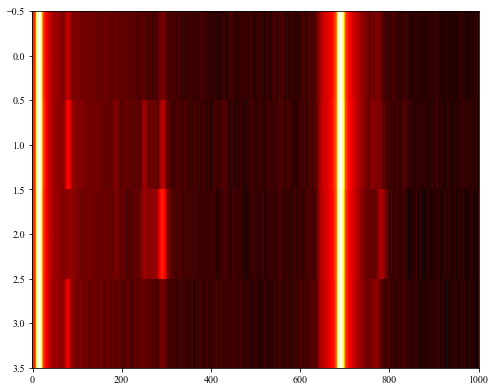

In [228]:
#%% Generate a data set which representing all the clusters
XRD_cluster_rep=np.zeros((k,alldata.shape[0]))
for i in range(k):
    XRD_cluster_rep[i,:]=datas[membership[:,i].argmax(axis=0),:]
plot_XRD_cluster_rep=plot_XRD_cluster_rep=plt.figure(figsize=(8,8))
plt.imshow(XRD_cluster_rep,aspect=50*k,cmap='hot',norm=LogNorm());
# plt.xlim(50,150)

In [229]:
#%%
np.savetxt(save_path+'/'+samplename+'_'+'XRD_cluster_rep.txt',XRD_cluster_rep)
plot_XRD_cluster_rep.savefig(save_path+'/'+samplename+'_'+'plot_XRD_cluster_rep.png',dpi=600,bbox_inches='tight')

(25, 65)

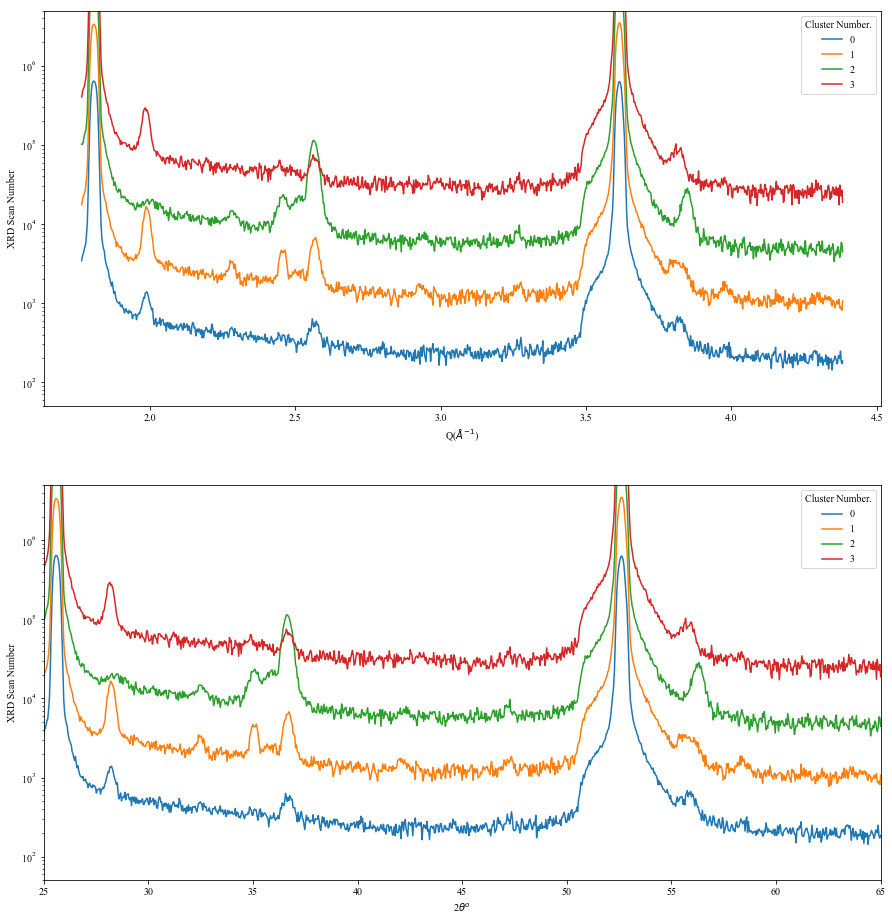

In [230]:
#%%
plot_clusters_XRD_seperate_summedrep=plt.figure(figsize=(15,16))
plt.subplot(2,1,1)
[plt.semilogy(Q,XRD_cluster_rep[i,:]*5**i,'-',label=i) for i in range(k)]
# plt.xlabel('$2\\theta^{o}$')
plt.xlabel('Q($\\AA^{-1}$)')
plt.ylabel('XRD Scan Number')
# plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.legend(title="Cluster Number.",loc='best')
plt.ylim(50,5e6);
# plt.xlim(2,3.3)
# plt.xlim(min(tth_c),max(tth_c))
#plt.colorbar()
plt.subplot(2,1,2)
[plt.semilogy(tth,XRD_cluster_rep[i,:]*5**i,'-',label=i) for i in range(k)]
# plt.xlabel('$2\\theta^{o}$')
plt.xlabel('2$\\theta^{o}$')
plt.ylabel('XRD Scan Number')
# plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.legend(title="Cluster Number.",loc='best')
plt.ylim(50,5e6);
plt.xlim(25,65)
# plt.xlim(min(tth_c),max(tth_c))
#plt.colorbar()

In [231]:
plot_clusters_XRD_seperate_summedrep.savefig(save_path+'/'+samplename+'_'+'plot_clusters_XRD_seperate_summedrep.png',dpi=300,bbox_inches='tight')

In [232]:
#%% filter cluster maping based on its value
#membership=np.genfromtxt(path+'/'+sample_name+'_'+'membership.txt')
membership_filtered = np.empty_like(membership)
membership_filtered[:] = membership
mask=(0.9>membership)
membership_filtered[mask]=0

markers=('o','v','<','>','p','*','h','H','D','d','v','<','>','s','p','*','h','H','D','d','>','p','*','h')

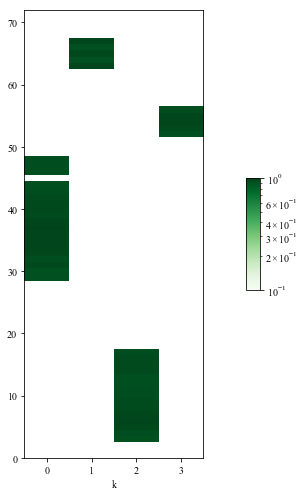

In [233]:
plot_data_cluster_filtered=plt.figure(figsize=(12,7))
plt.imshow(membership_filtered,origin=rows,aspect=2.5*k/ns,cmap='Greens',norm=LogNorm(vmin=0.1,vmax=1))
plt.xlabel('k')
plt.ylim(0,ns)
plt.colorbar(shrink=0.25,aspect=8)
plt.tight_layout()

In [234]:
membership_filtered.shape

(72, 4)

In [235]:
location

array([[  0.  , -12.15],
       [  0.  , -11.8 ],
       [  0.  , -11.45],
       [  0.  , -11.1 ],
       [  0.  , -10.75],
       [  0.  , -10.4 ],
       [  0.  , -10.05],
       [  0.  ,  -9.7 ],
       [  0.  ,  -9.35],
       [  0.  ,  -9.  ],
       [  0.  ,  -8.65],
       [  0.  ,  -8.3 ],
       [  0.  ,  -7.95],
       [  0.  ,  -7.6 ],
       [  0.  ,  -7.25],
       [  0.  ,  -6.9 ],
       [  0.  ,  -6.55],
       [  0.  ,  -6.2 ],
       [  0.  ,  -5.85],
       [  0.  ,  -5.5 ],
       [  0.  ,  -5.15],
       [  0.  ,  -4.8 ],
       [  0.  ,  -4.45],
       [  0.  ,  -4.1 ],
       [  0.  ,  -3.75],
       [  0.  ,  -3.4 ],
       [  0.  ,  -3.05],
       [  0.  ,  -2.7 ],
       [  0.  ,  -2.35],
       [  0.  ,  -2.  ],
       [  0.  ,  -1.65],
       [  0.  ,  -1.3 ],
       [  0.  ,  -0.95],
       [  0.  ,  -0.6 ],
       [  0.  ,  -0.25],
       [  0.  ,   0.1 ],
       [  0.  ,   0.45],
       [  0.  ,   0.8 ],
       [  0.  ,   1.15],
       [  0.  ,   1.5 ],


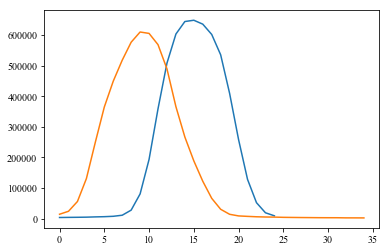

In [236]:
plt.plot(datas[1,:25])
plt.plot(datas[1,-320:-285])

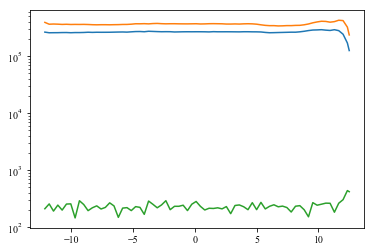

In [237]:
plt.semilogy(location[:,1],datas[:,20])
plt.semilogy(location[:,1],datas[:,-315])
plt.semilogy(location[:,1],datas[:,500])

In [238]:
#%% Map on wafer
rows=datas.shape[0]
rgba_colors = np.zeros((rows,4))
# for red the first column needs to be one
#rgba_colors[:,0] = 0
#rgba_colors[:,1] = 0
#rgba_colors[:,2] = 0

colors = iter(mpl.cm.jet(np.linspace(0, 1, k)))

plot_wafer_clusters_maped_filtered=plt.figure(figsize=(11,11))
# for i in range(k):
dummyx=np.linspace(0,73,73)
dummyy=np.ones_like(dummyx)
count=0
for i in range(73):
    alphas=membership_filtered[i,:]  # the fourth column needs to be your alphas
    rgba_colors[:, 3] = alphas
    plt.scatter(dummyx,
                dummyx*count,
                marker='|',
                norm=LogNorm(vmin=100,vmax=1e4),
                cmap='viridis',
                s=200,
                c=alphas,
                alpha=1)
    count+=1
plt.title('Clusters mapped_together_membership>0.95_'+samplename,y=1.01,fontsize=16)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
ax.set_aspect('equal')
# plt.xlim(-50,50)
# plt.ylim(-50,50)
plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.tight_layout()
plt.show()

ValueError: could not broadcast input array from shape (4) into shape (72)

<Figure size 792x792 with 0 Axes>

In [ ]:
#%% Get together xrd data for each cluster in seperate vasiable
for i in range(k):
    mask = (0.9 < membership[:,i])
    globals()['cluster_%s' %i] = datas[mask,:] 
#     globals()['cluster_%s' %i] = np.hstack((xrd_xy[mask,:],A123[mask,:],datas[mask,:]))
    globals()['cluster_%s' %i] = np.hstack((xrd_xy[mask,:],datas[mask,:]))

    print(globals()['cluster_%s' %i].shape) 
    np.savetxt(save_path+'/'+samplename+'_'+'XRD_data_cluster_'+str(i)+'_of_n.txt',globals()['cluster_%s' %i],comments="This data contains xy, atomic ratios and xrd.")
    #This data contains xy, atomic ratios and xrd

In [ ]:
#%% Sort and plot the cluster of interest
for j in range(k):
# for j in range(1):
    count=1
    globals()['Plot_cluster_%s' %j]=plt.figure(figsize=(5,2));    
    for i in range(globals()['cluster_%s' %j].shape[0]):
        plt.scatter(Q,ones*i,
#         plt.scatter(q,one,
                    marker='|',
                    s=150,
                    c=globals()['cluster_%s' %j][i,2:],
                    norm=LogNorm(vmin=100,vmax=1e4),
                    cmap='viridis'
                    );
#     plt.xlabel('2$\\theta ^o$')
    plt.xlabel('Q($\\AA^{-1}$)')
    plt.ylabel('Member in the cluster')   
    plt.title('Cluster '+str(j))
    plt.xlim(min(Q),max(Q));
    plt.ylim(0,globals()['cluster_%s' %j].shape[0]-1)
    plt.colorbar()
    globals()['Plot_cluster_%s' %j].savefig(save_path+samplename+'_'+'XRD_data_plot_cluster_'+str(j)+'.png')

## Look at range 50+-3

In [97]:
scan_50=np.sum(datas[45:52,:],axis=0)

In [98]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [99]:
np.sum(scan_50,axis=0).shape
Q.shape

(1001,)

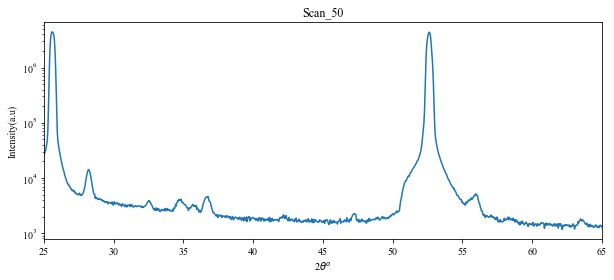

In [100]:
fig_scan_50=plt.figure(figsize=(10,4))
plt.semilogy(tth,scan_50)
plt.xlabel('2$\\theta ^o$')
# plt.xlabel('Q($\\AA^{-1}$)')
plt.ylabel('Intensity(a.u)')   
plt.title('Scan_50')
plt.xlim(min(tth),max(tth));

In [101]:
fig_scan_50.savefig('fig_scan_50.png',dpi=300)

## Check for buried peaks

### 25.35

In [55]:
tth[9]
# tth.shape

25.36

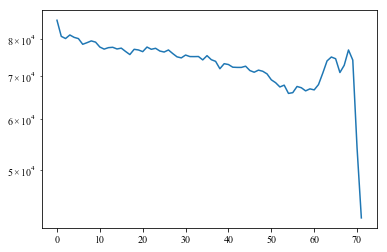

In [107]:
# plt.plot(datas[:65,8])
plt.semilogy(datas[:,9])
# plt.plot(datas[:65,10])

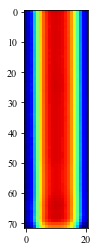

In [349]:
plt.imshow(datas[:,5:26],
           cmap='jet',
          norm=LogNorm(vmin=5000,vmax=1e6))

## 52.1

In [129]:
tth[678],tth[790]

(52.12, 56.6)

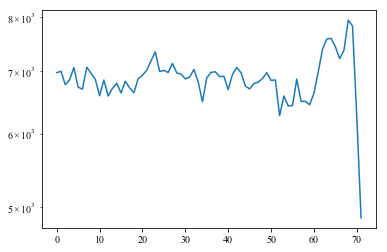

In [126]:
plt.semilogy(datas[:,678])

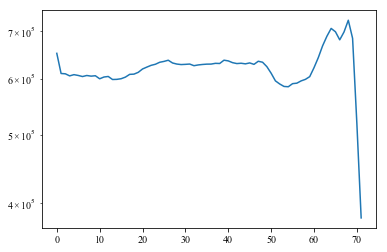

In [127]:
plt.semilogy(datas[:,690])

In [ ]:
fig = plt.figure(st)

In [130]:
plt.style.available

['ggplot',
 'seaborn-muted',
 'classic',
 'seaborn',
 'tableau-colorblind10',
 '_classic_test',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-notebook',
 'seaborn-talk',
 'seaborn-deep',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'dark_background',
 'grayscale',
 'seaborn-white',
 'seaborn-poster',
 'seaborn-dark',
 'bmh',
 'fast',
 'seaborn-dark-palette',
 'seaborn-pastel',
 'seaborn-paper',
 'Solarize_Light2',
 'seaborn-colorblind']

In [96]:
plt.style.use('seaborn-poster')
plt.plot(datas[:,690],'o')

NameError: name 'datas' is not defined

## XPS data

In [3]:
pwd


'D:\\Box Sync\\TaON\\TiON_gradient_20190315__rSap_annealed\\TaON_gradient_20190315_rSap_annealed_Analysis'

In [37]:
np.genfromtxt(r'D:\Box Sync\TaON\TiON_gradient_20190315__rSap_annealed\xps_190729\Experiment\Mono 500µm\Line\28.txt',
             skip_header=15).shape

(151, 26)

In [95]:
ene=28
xps=np.genfromtxt(path+str(ene)+".txt",
             skip_header=15)
for i in range(25):
#     print(i)
    file=np.vstack((xps[:,0],xps[:,i+1])).T
    np.savetxt(path+str(ene)+"_"+str(i)+".txt",file,fmt='%1.1f')

In [159]:
plt.style.available

['fast',
 'seaborn-bright',
 'seaborn-deep',
 'seaborn-colorblind',
 'Solarize_Light2',
 'classic',
 'seaborn-talk',
 'seaborn-dark',
 'seaborn-darkgrid',
 '_classic_test',
 'seaborn-muted',
 'grayscale',
 'seaborn-pastel',
 'seaborn-ticks',
 'dark_background',
 'seaborn-dark-palette',
 'bmh',
 'seaborn-white',
 'fivethirtyeight',
 'seaborn-notebook',
 'seaborn-whitegrid',
 'seaborn',
 'seaborn-paper',
 'ggplot',
 'tableau-colorblind10',
 'seaborn-poster']

Text(0, 0.5, 'CPS')

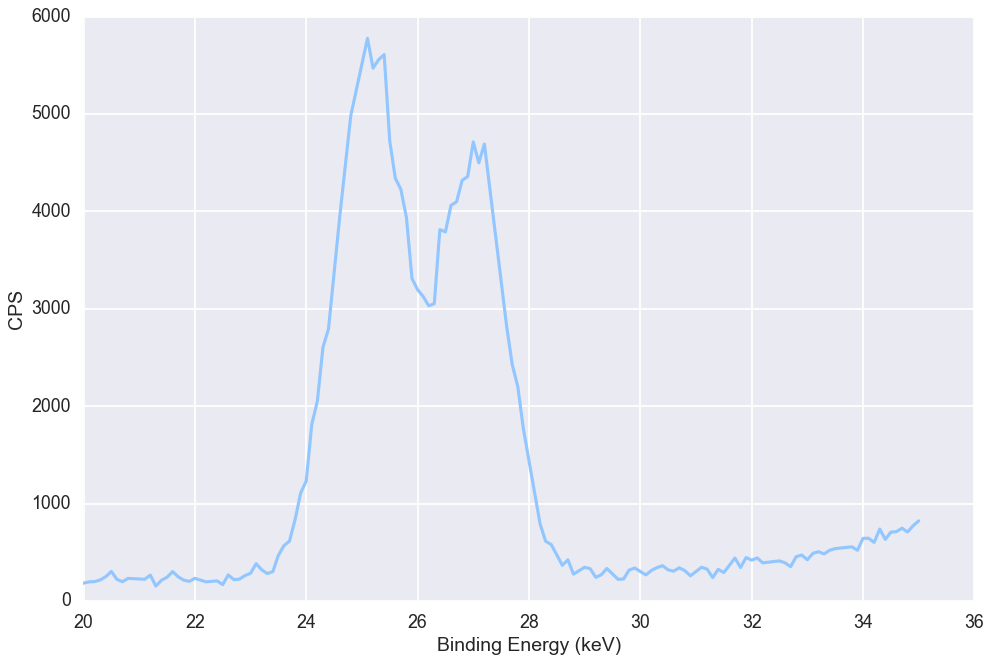

In [195]:
plt.style.use('seaborn-poster')
plt.plot(file[:,0],file[:,1])
plt.xlabel('Binding Energy (keV)')
plt.ylabel('CPS')